In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from funkcje import *

c:\Users\siwie\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data Processing

In [2]:
# Wczytywanie danych z trzech plików csv
df = pd.read_csv('jogurt_kefir_synchr.csv', encoding="ISO-8859-1", 
                 low_memory=False, nrows=362)
df1 = pd.read_csv('jogurt_kefir_synchr1.csv', encoding="ISO-8859-1", 
                  low_memory=False, nrows=362)
df2 = pd.read_csv('jogurt_kefir_synchr2.csv', encoding="ISO-8859-1", 
                  low_memory=False, nrows=362)


In [3]:
# Usuwanie ostatniej, pustej kolumny w każdym dataframe
df.drop('Unnamed: 480', axis=1, inplace=True)
df1.drop('Unnamed: 480', axis=1, inplace=True)
df2.drop('Unnamed: 480', axis=1, inplace=True)

# Zmiana nazw kolumn Unnamed w df1 i df2
df1 = rename_unnamed_columns(df1, 481)
df2 = rename_unnamed_columns(df2, 961)

# Tworzenie połączonego dataframe
data = pd.concat([df, df1, df2], axis=1)


In [4]:
# Słownik zamienników dla skrótów na pełne nazwy
replacements = {
    "jort": "jogurt",
    "pocz¹tek": "początek", 
    "zamkniêty" : "zamknięty", 
    "jog natur" : "jogurt naturalny",
    "jog nat_początek2" : "jogurt naturalny_początek5",
    "jog nat_początek1" : "jogurt naturalny_początek4",
    "jog nat_początek" : "jogurt naturalny_początek3",  
    "jog trusk_początek2" : "jogurt truskawka_początek5",
    "jog trusk_początek1" : "jogurt truskawka_początek4",
    "jog trusk_początek" : "jogurt truskawka_początek3",    
    "jog nat" : "jogurt naturalny",
    "jog trusk" : "jogurt truskawka"
}

# Zastosowanie funkcji do zmiany nazw do każdej kolumny
data.columns = [replace_name(col, replacements).replace(" ", "_") for col in data.columns]

# Pominięcie pierwszego wiersza
valData = data.iloc[1:]

# Rozdzielanie nazw na nowe kolumny
data = split_column_names(data)

# Wyodrębnienie kolumn "Unnamed:_i" z nieparzystymi liczbami od 1 do 1439
unnamed_columns = [col for col in valData.columns if re.match(r'Unnamed:_\d+', col) and int(col.split('_')[1]) % 2 != 0 and int(col.split('_')[1]) <= 1439]

# Przekształcenie kolumn na wektory wierszowe
unnamed_data = valData[unnamed_columns].T

# Uzupełnienie nowego DataFrame wartościami z kolumn "Unnamed:_i"
for i, col in enumerate(range(240, 601)): 
    data[str(col)] = unnamed_data.iloc[:, i].values

data.head()

Nazwa    Status Numer      Czas  dL          240          241  \
0  jogurt_naturalny  początek     0  początek  30  6.807383537  6.575760365   
1  jogurt_naturalny  początek     0  początek  40  5.872513294  5.819108486   
2  jogurt_naturalny  początek     0  początek  50  14.46979809  14.51586342   
3  jogurt_naturalny  początek     0  początek  60  43.99132538  44.43400574   
4  jogurt_naturalny  początek     0  początek  70   96.6428299  96.22018433   

           242          243          244  ...          591          592  \
0  6.337492943  5.874998093  6.292390347  ...  14.23722553  14.14950371   
1  6.034695148  6.193667889  6.300446033  ...  10.75729942  10.62443447   
2  14.70676041  15.44167328  16.47039223  ...  7.794281006  7.683727741   
3  44.02709198  45.18645859  46.99568176  ...  6.422884464  6.349466801   
4  93.86083221  95.20815277  96.25804901  ...  5.571760178  5.459169865   

           593          594          595          596          597  \
0  14.05822659  14.00384235  13.85585117  13.66411972  13.92471123   
1  10.48354721  10.27874374  10.04849243  9.615001678  9.413671494   
2  7.593907356  7.426756859  7.369203091  7.073904037  6.971441746   
3  6.395228863  6.441860676    6.0557971  6.073560238  6.089416504   
4  5.141180038  5.046103477  4.840631485  4.724726677  4.831632137   

           598          599          600  
0  13.27398205  13.28486443  13.08647633  
1  9.385579109  9.076517105  9.234862328  
2  7.067602634  6.831822395  7.009384632  
3  6.155488968  6.170433998  6.173687458  
4  4.774603367  4.721427917  4.832276821  

[5 rows x 366 columns]

In [5]:
data.size

263520

In [6]:
data.shape

(720, 366)

Metody redukcji wymiarowości

In [7]:
# Eliminowanie kolumn które nie są używane jako zmienne wejściowe
X = data.drop(columns=['Nazwa', 'Status', 'Numer', 'Czas', 'dL'])

# Tworzenie zbioru etykiet
labels = data[['Nazwa', 'Status', 'Czas', 'dL']]


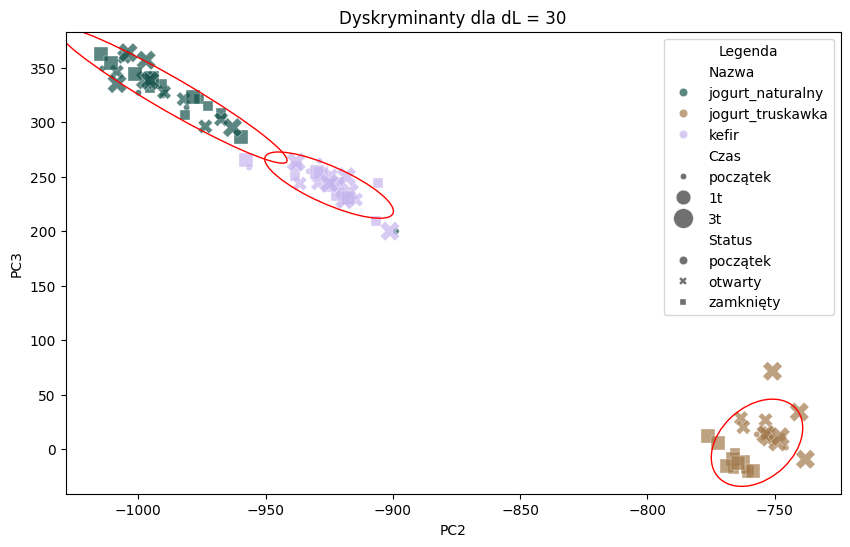

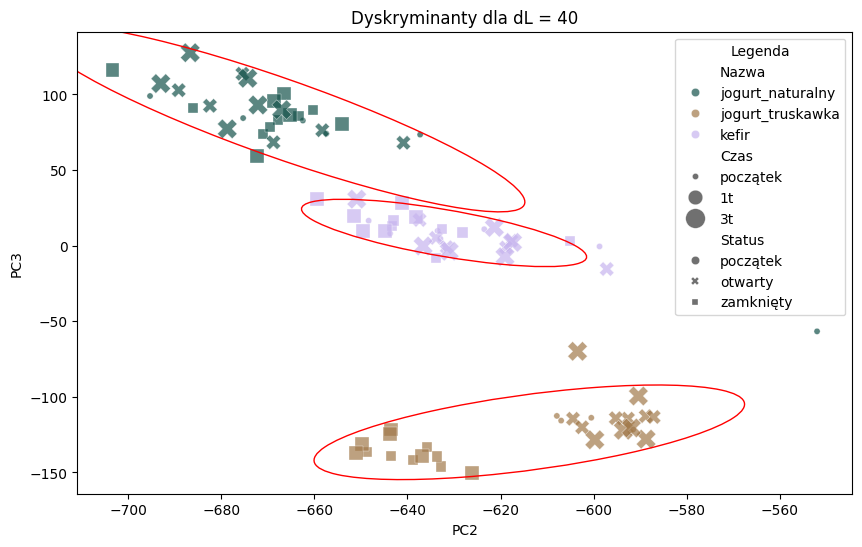

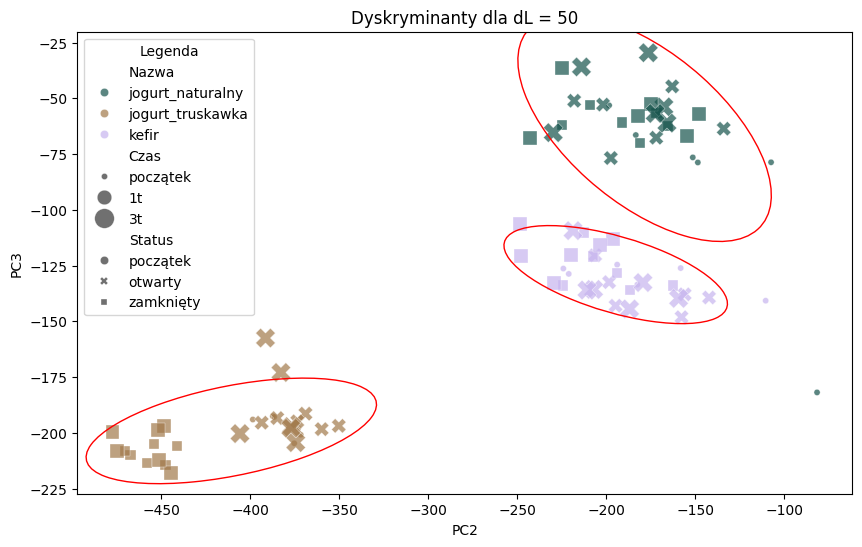

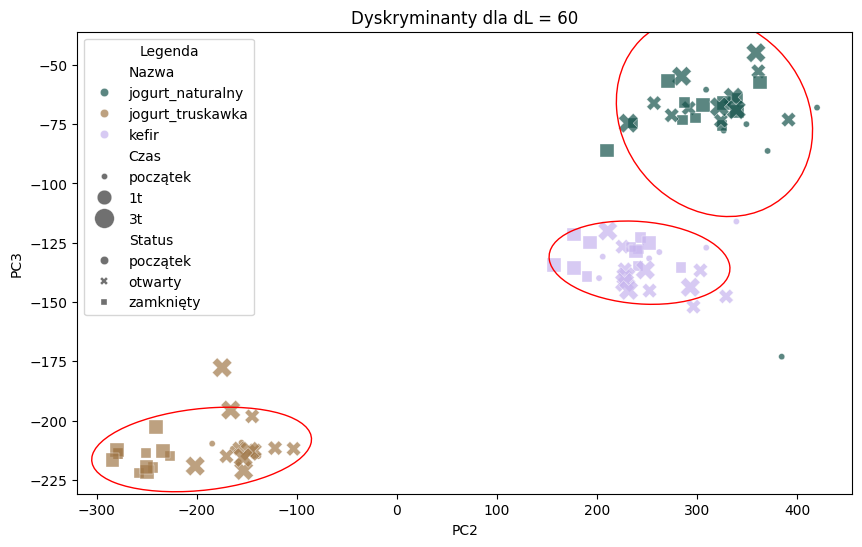

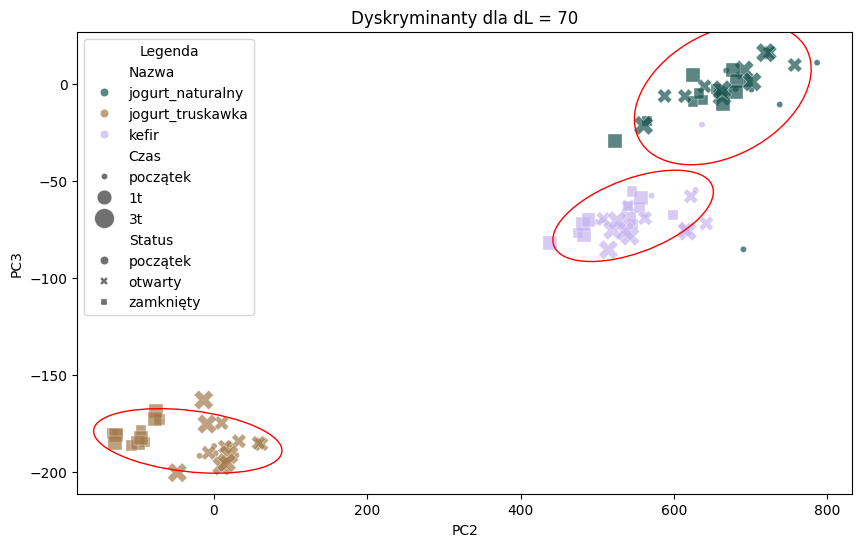

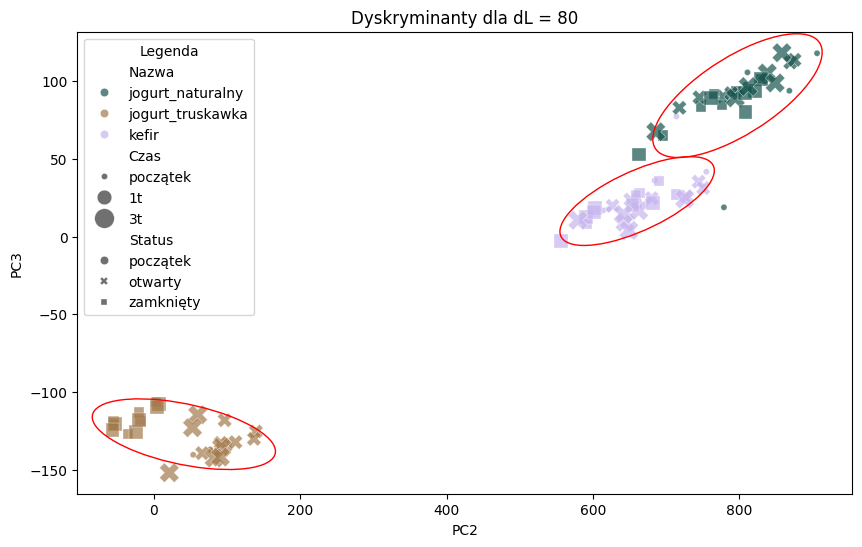

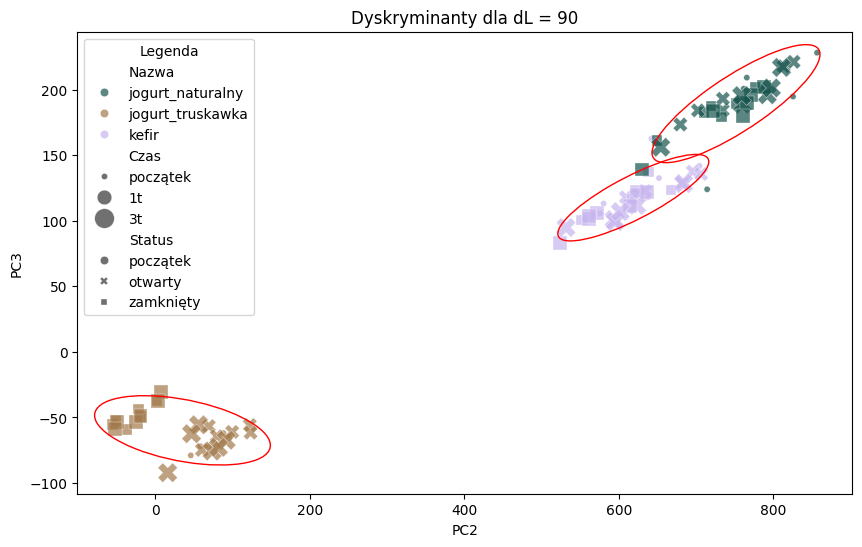

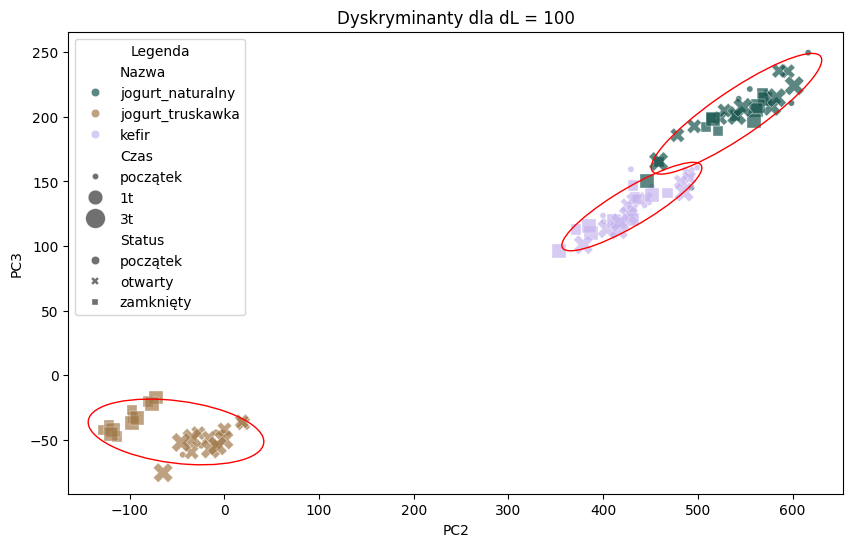

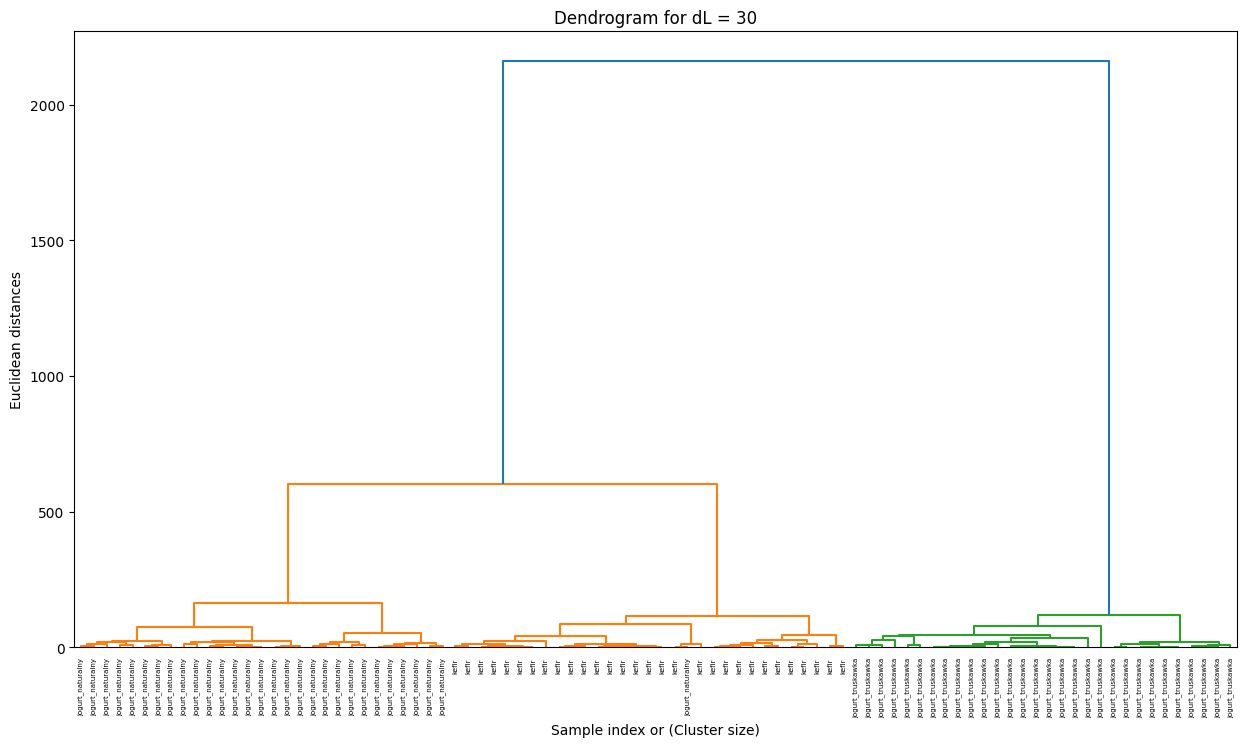

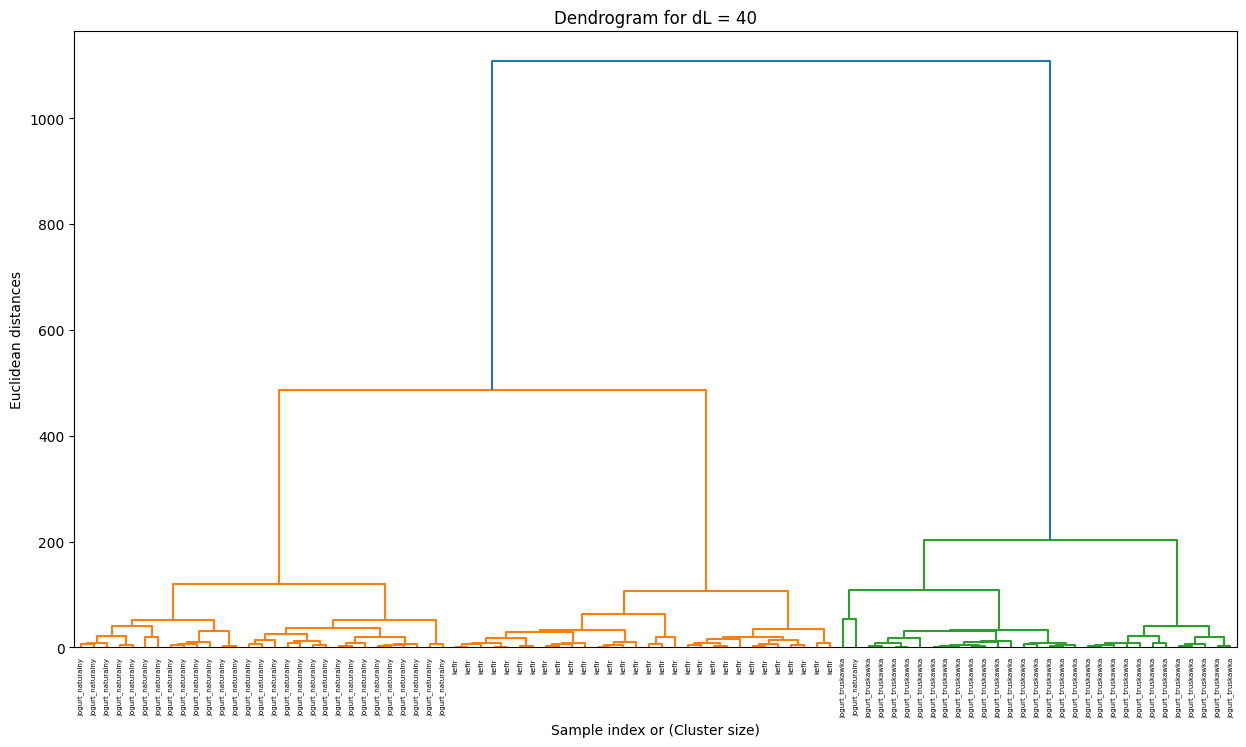

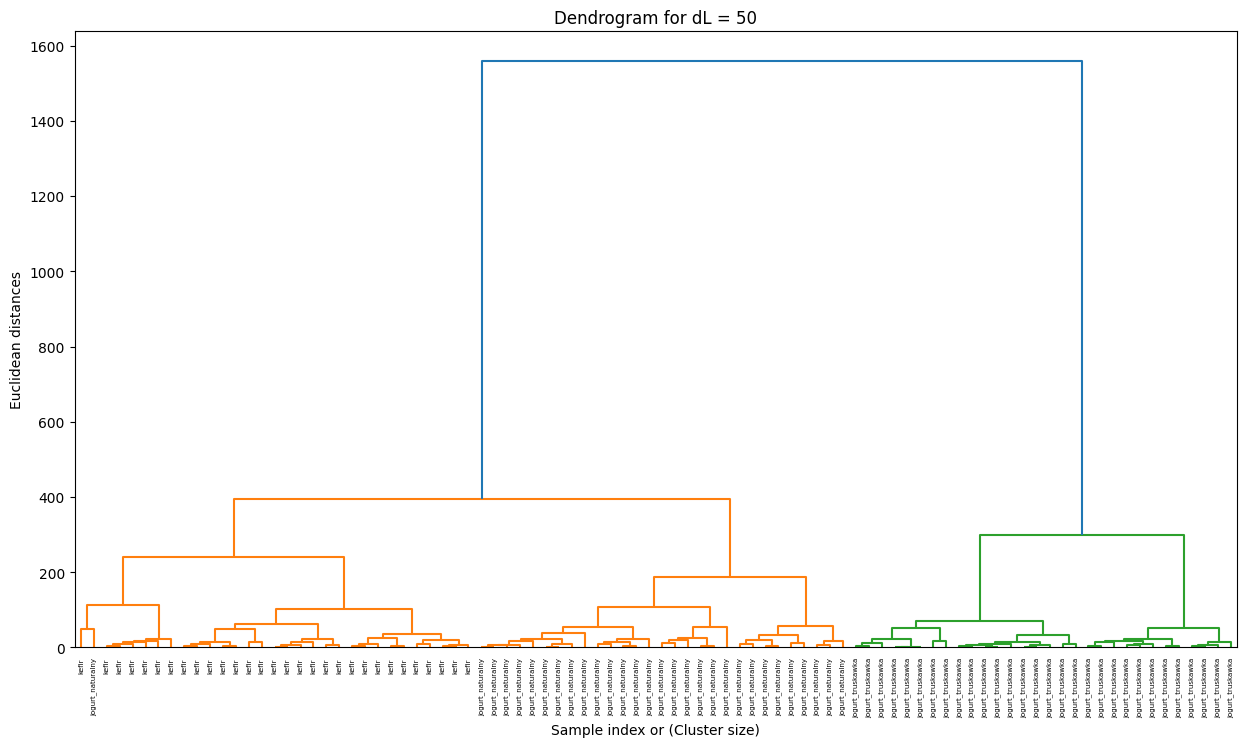

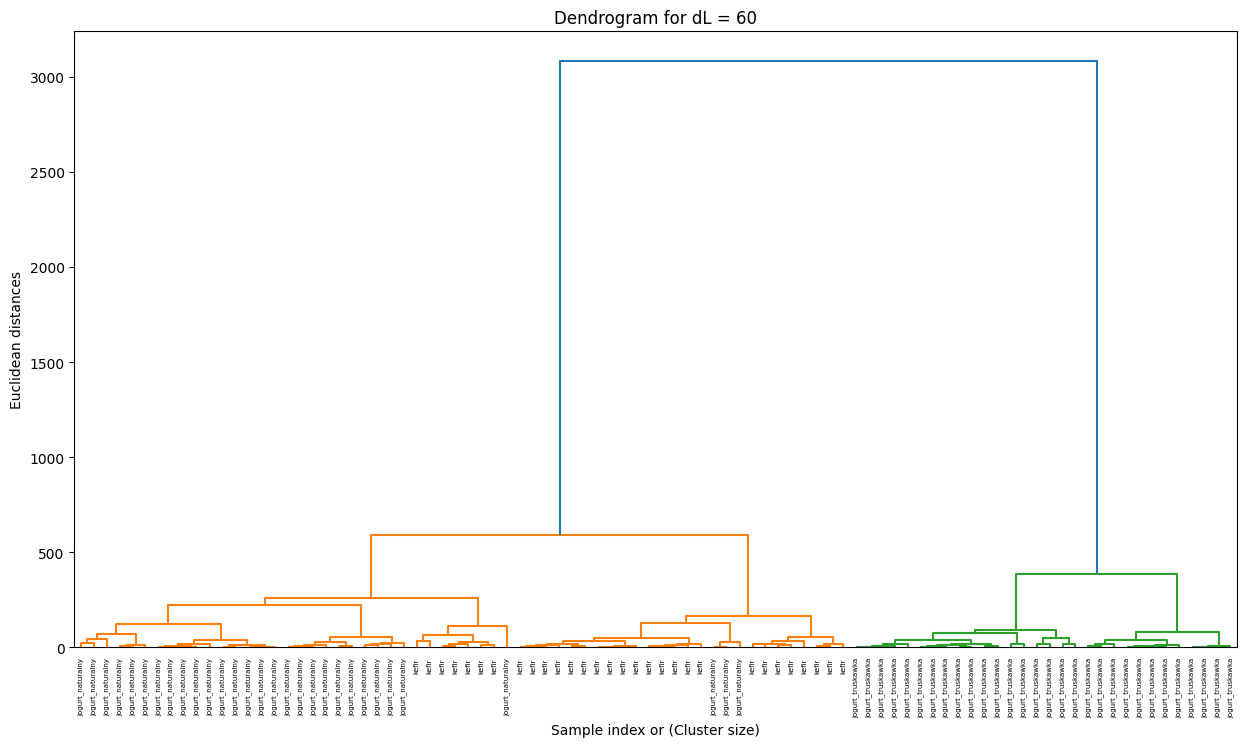

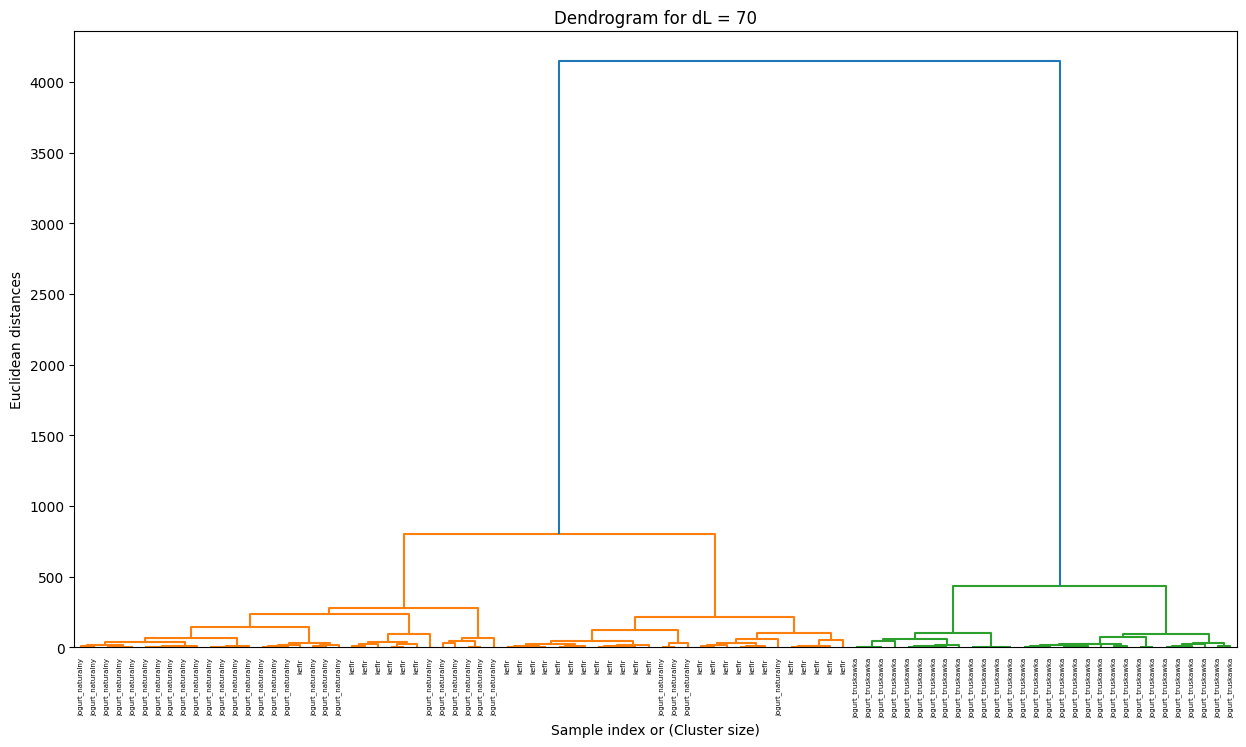

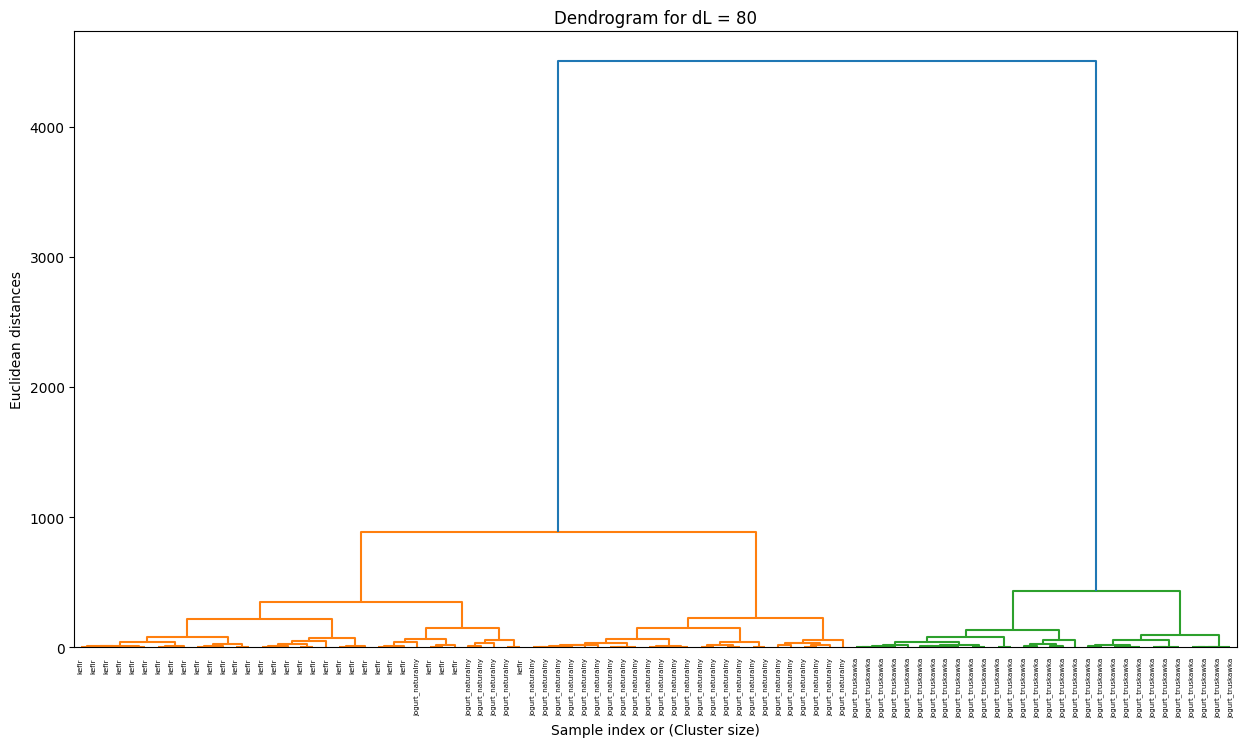

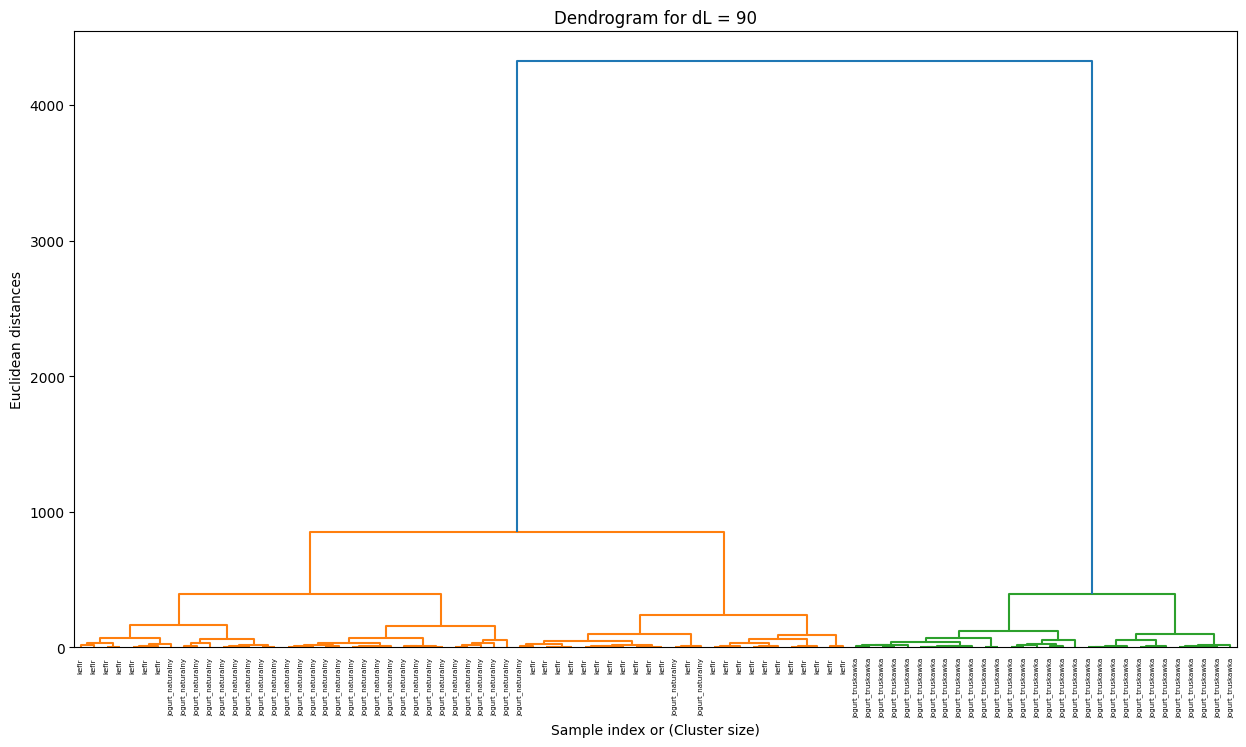

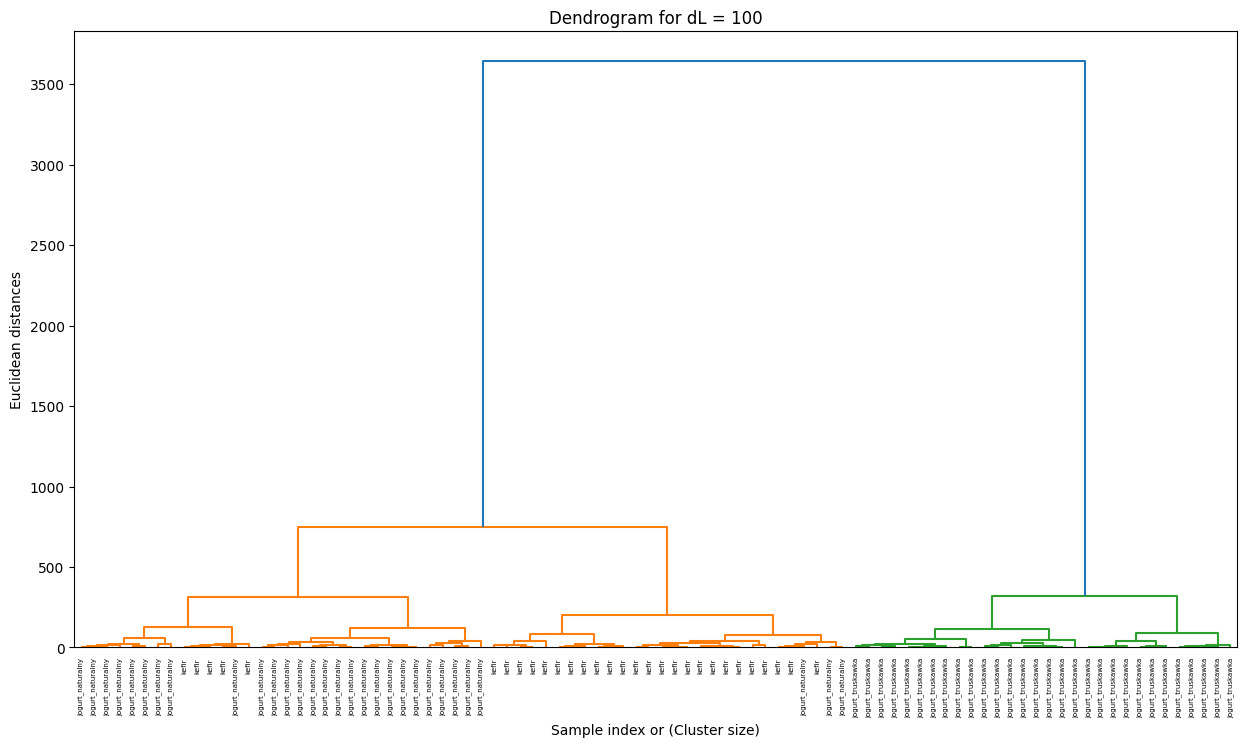

In [11]:
# Tworzenie modelu PCA
pca_df, pca = create_model(model_name=PCA,
                           data=X,
                           labels=labels,
                           columns=['PC1', 'PC2', 'PC3'],
                           n_components=3)

# Rysowanie wykresów dla PCA
draw(model_df=pca_df, discriminant_cols=['PC2', 'PC3'], use_hull=False, use_confidence_ellipse=True, n_std=2.0)

# Rysowanie dendogramu dla PCA
draw_dendrogram_by_dl(data=pca_df, 
                      x_cols=['PC2', 'PC3'], 
                      group_column='dL', 
                      label_column='Nazwa')


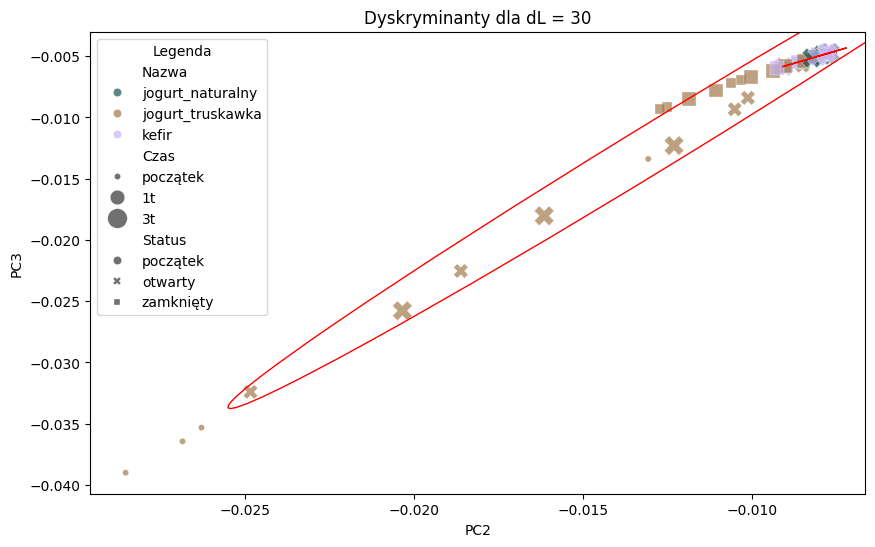

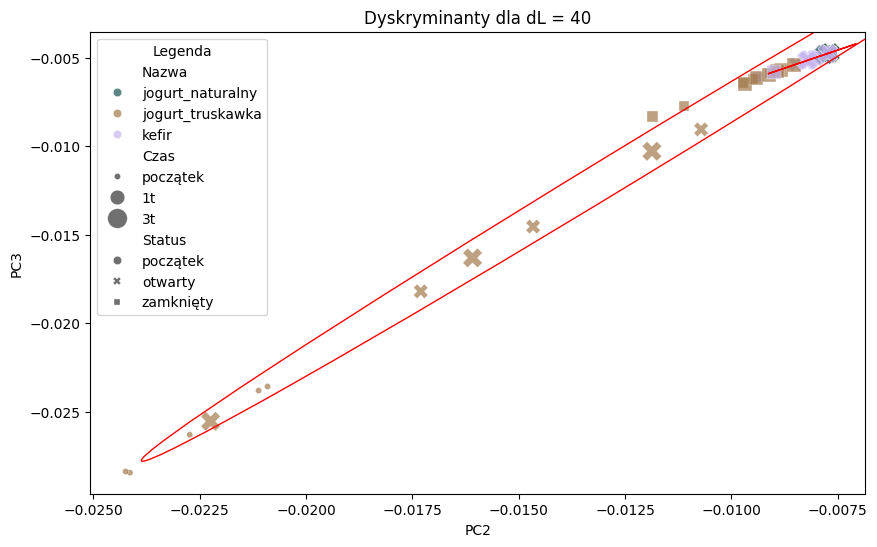

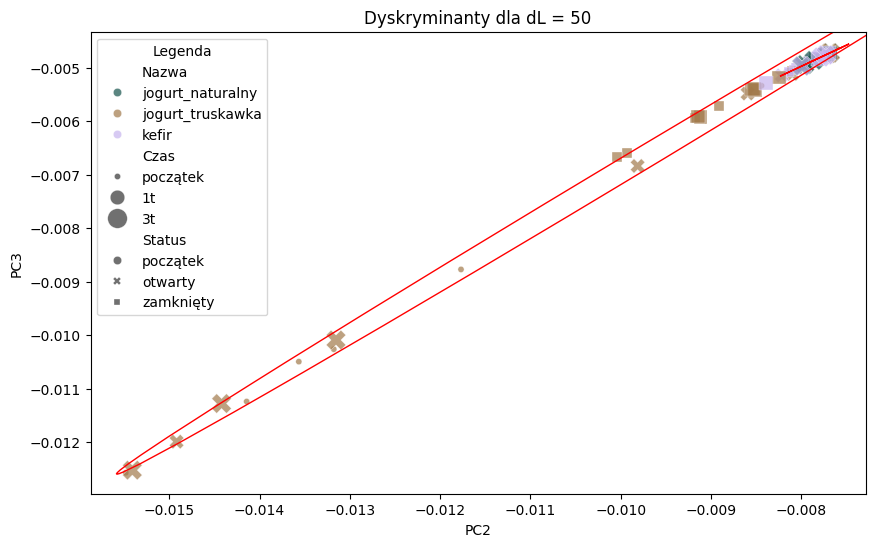

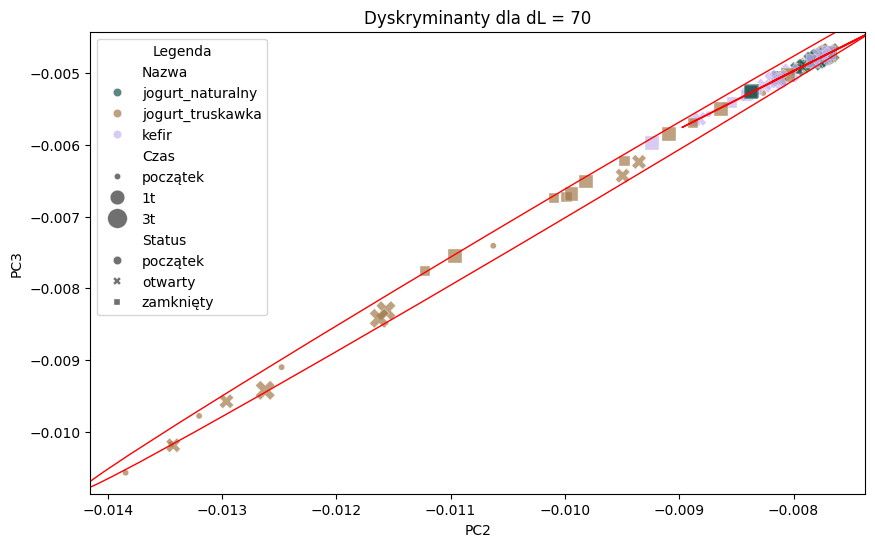

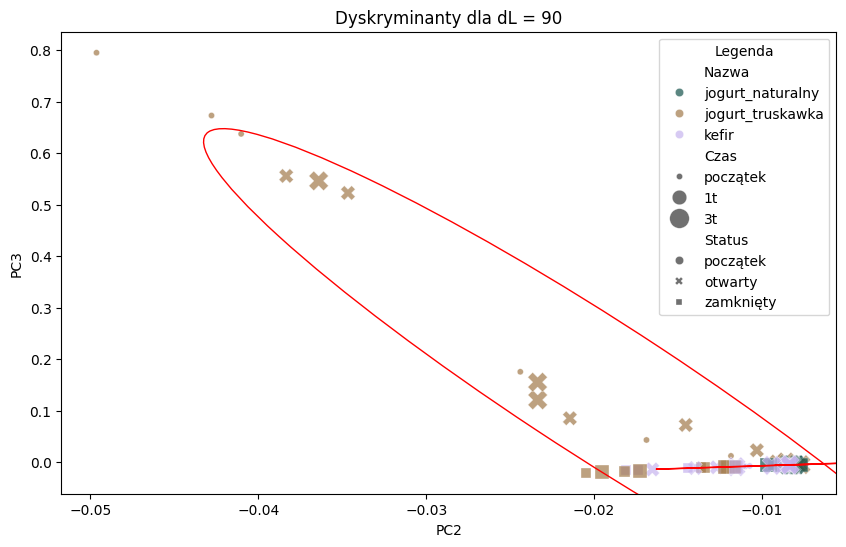

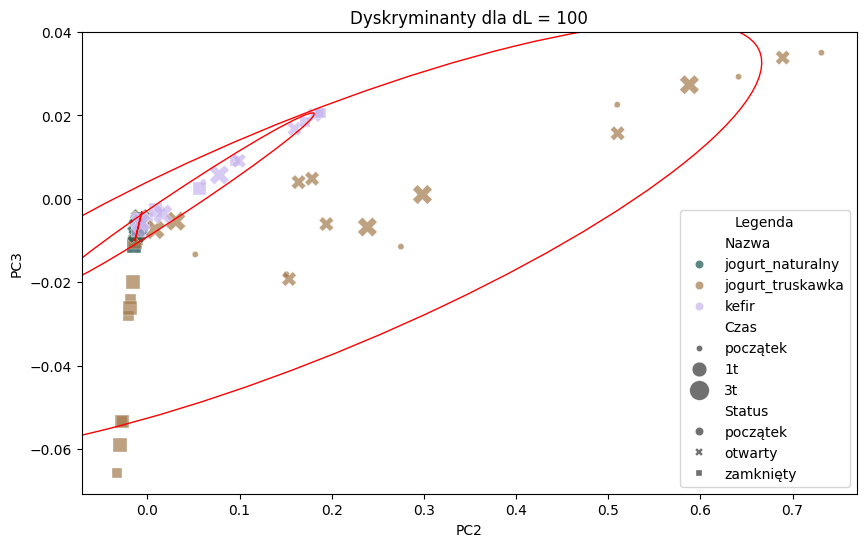

In [18]:
# Tworzenie modelu kPCA
pca_df, pca = create_model(model_name=KernelPCA,
                           data=X,
                           labels=labels,
                           columns=['PC1', 'PC2', 'PC3'],
                           n_components=3,
                           kernel='rbf')

# Rysowanie wykresów dla PCA
draw(model_df=pca_df, discriminant_cols=['PC2', 'PC3'], use_hull=False, use_confidence_ellipse=True, n_std=2.0)

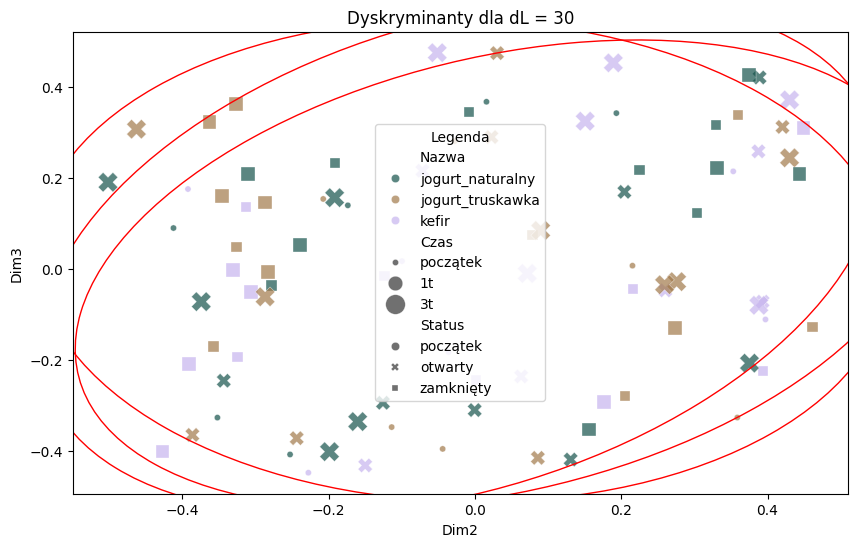

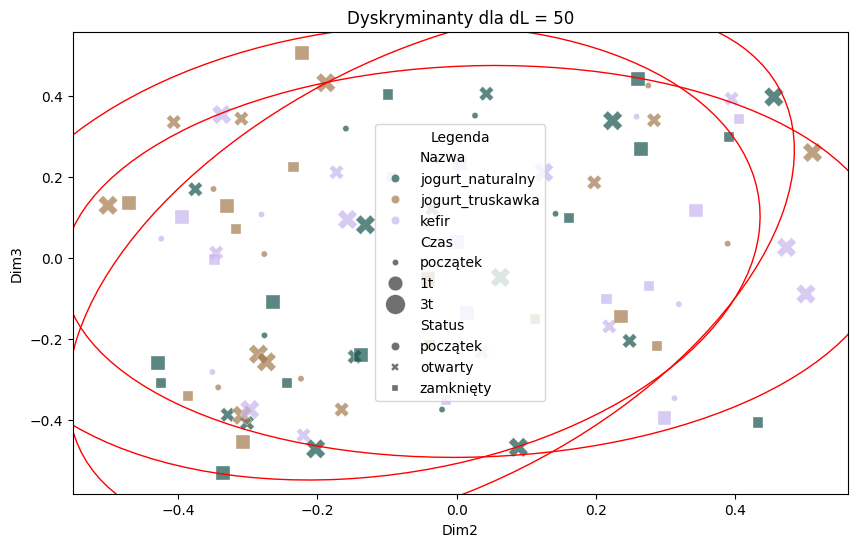

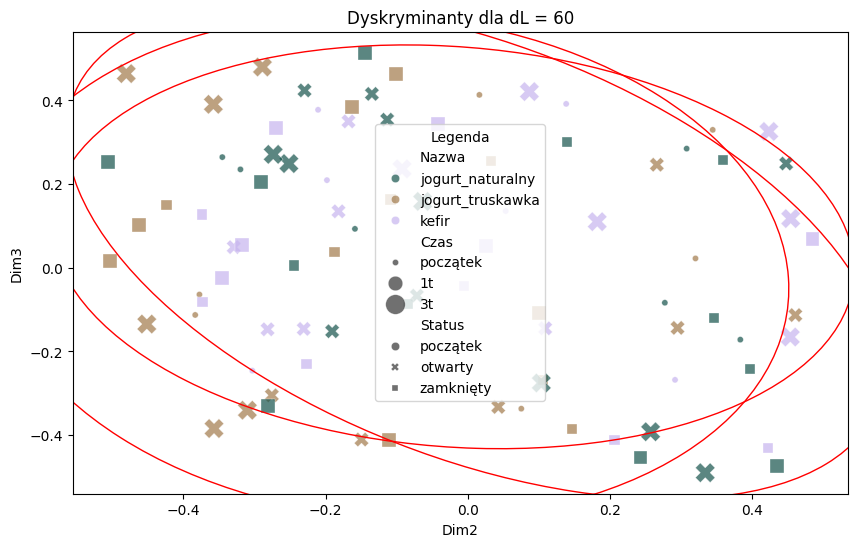

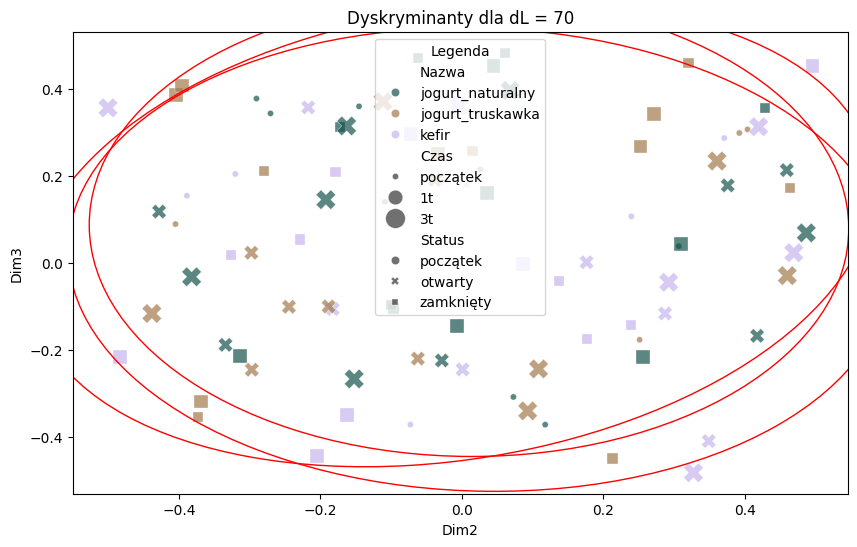

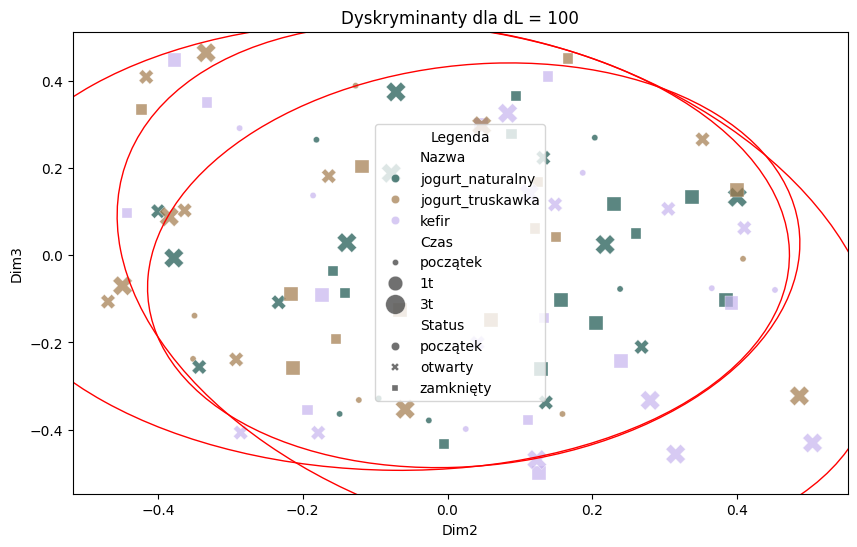

In [60]:
# Tworzenie modelu NMDS/MDS
nmds_df, nmds = create_model(model_name=MDS,
                           data=X,
                           labels=labels,
                           columns=['Dim1', 'Dim2', 'Dim3'],
                           n_components=3,
                           metric=False)

# Rysowanie wykresów dla NMDS/MDS
draw(model_df=nmds_df, discriminant_cols=['Dim2', 'Dim3'], use_hull=False, use_confidence_ellipse=True, n_std=2.0)


c:\Users\siwie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


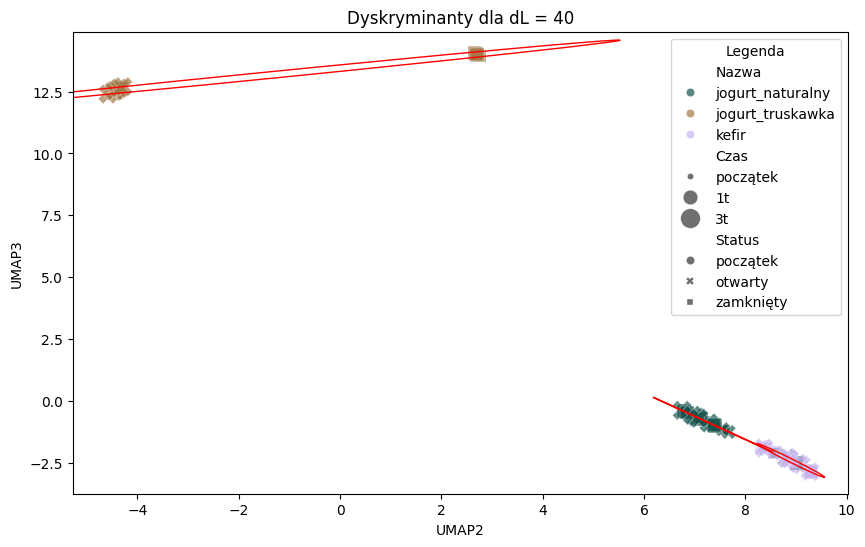

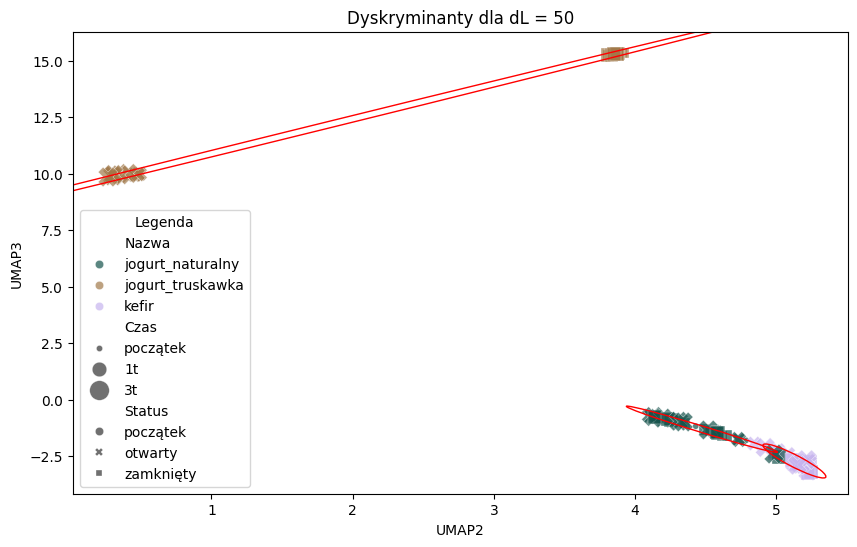

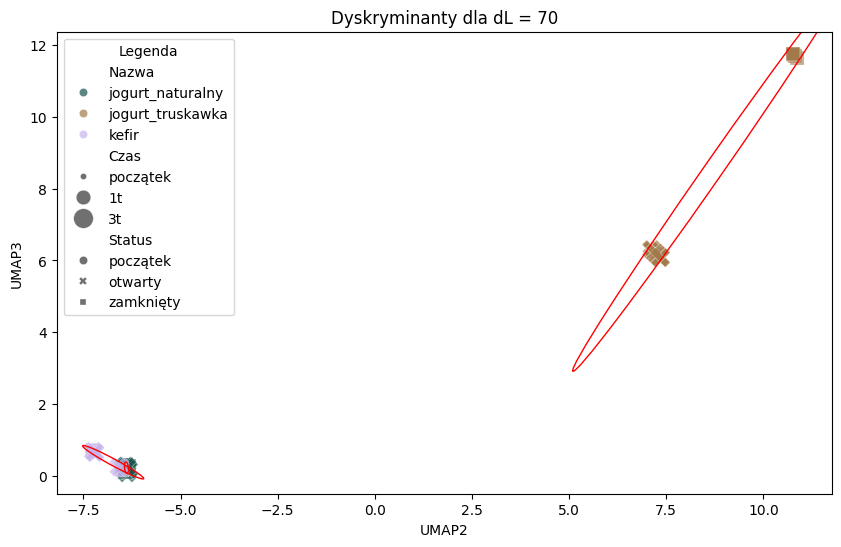

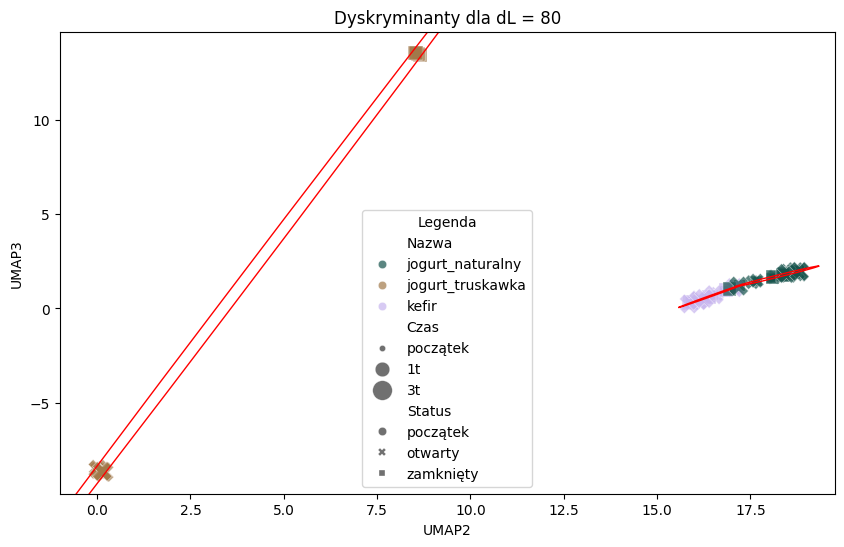

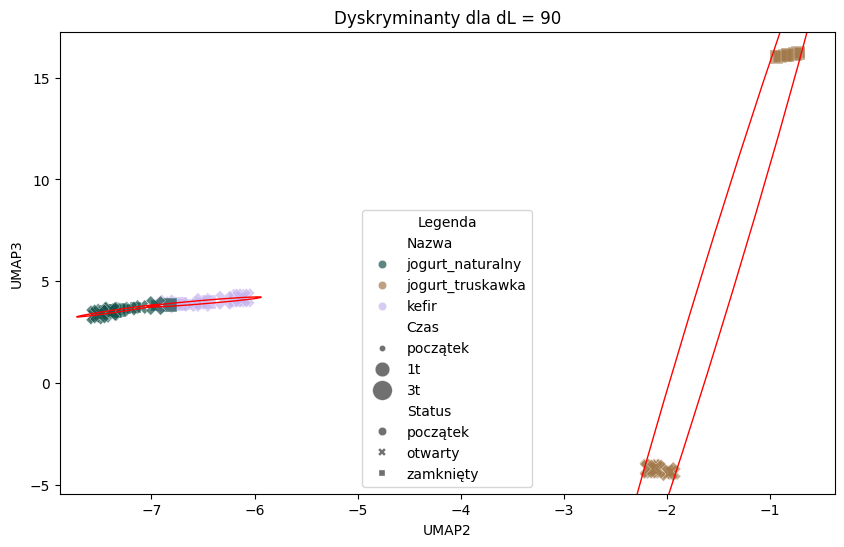

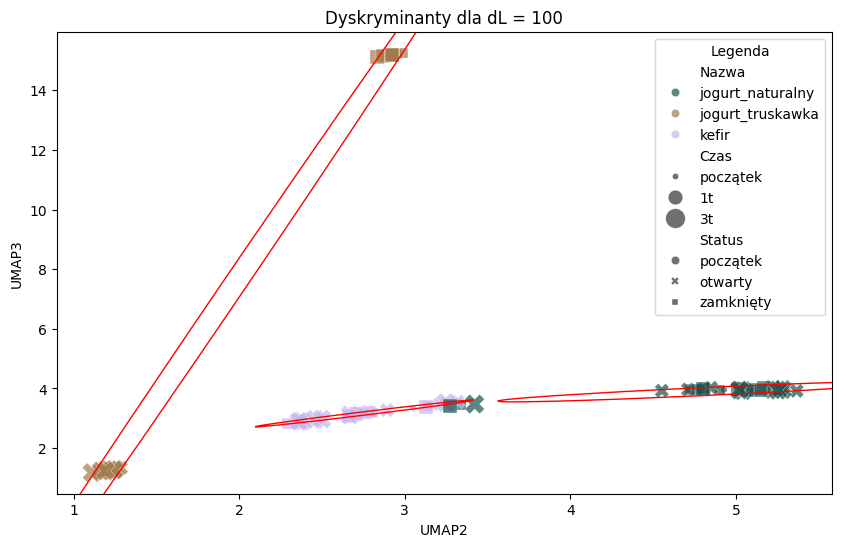

In [8]:
# Tworzenie modelu UMAP
umap_df, umap = create_model(model_name=umap.UMAP,
                           data=X,
                           labels=labels,
                           columns=['UMAP1', 'UMAP2', 'UMAP3'],
                           n_components=3)

# Rysowanie wykresów dla UMAP
draw(model_df=umap_df, discriminant_cols=['UMAP2', 'UMAP3'], use_hull=False, use_confidence_ellipse=True, n_std=2.0)

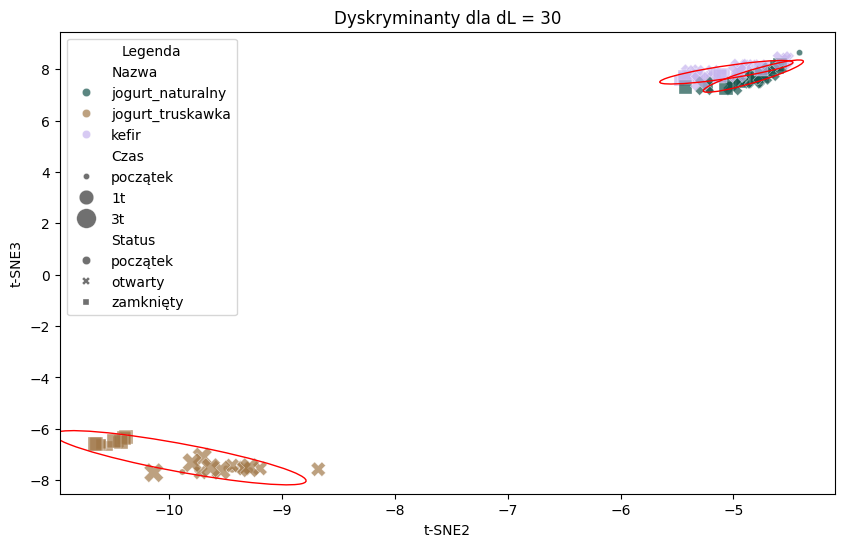

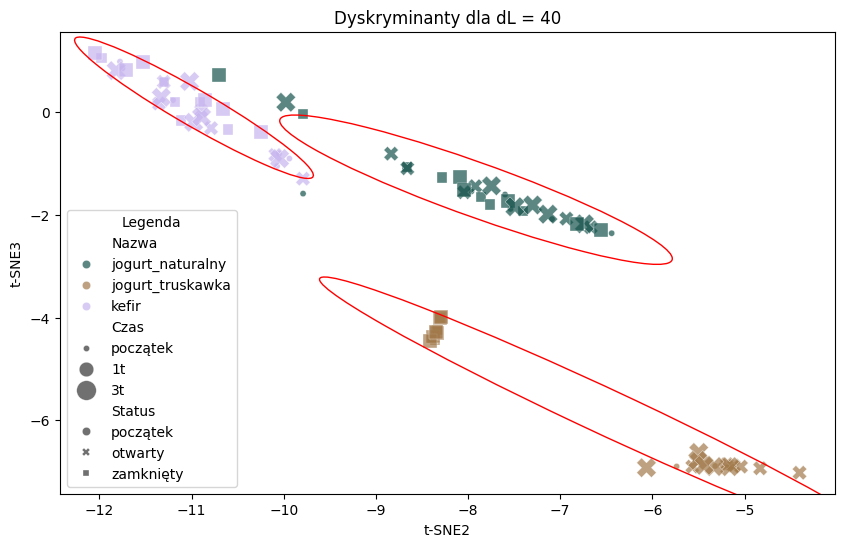

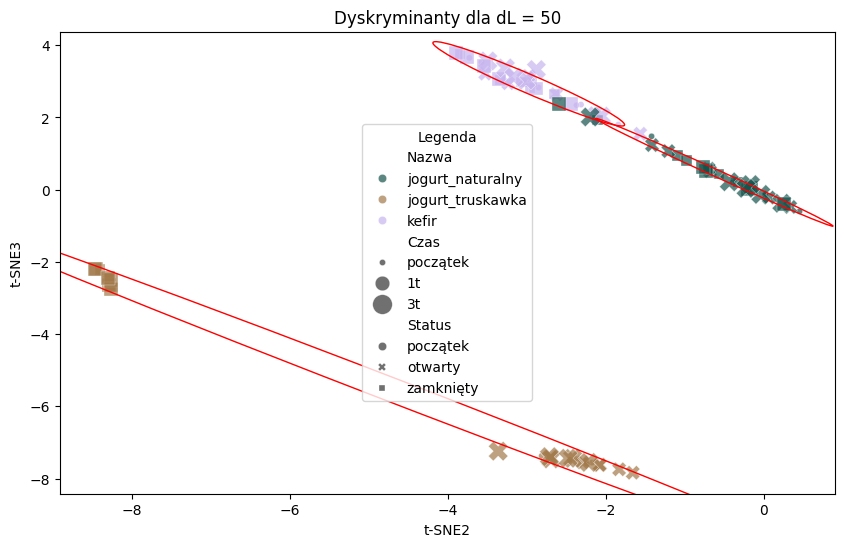

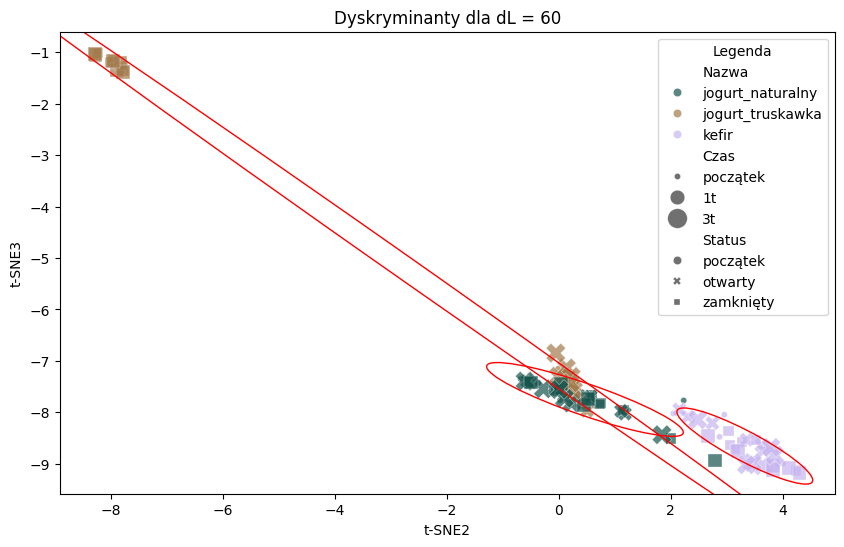

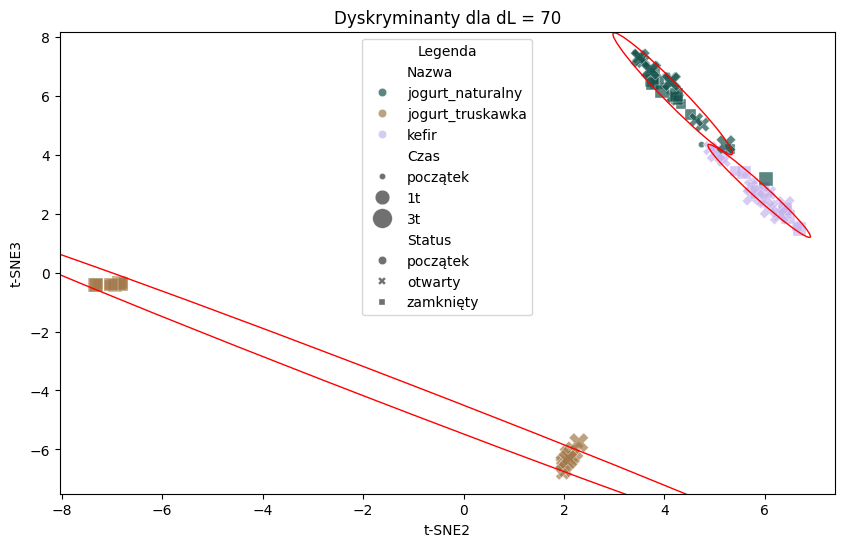

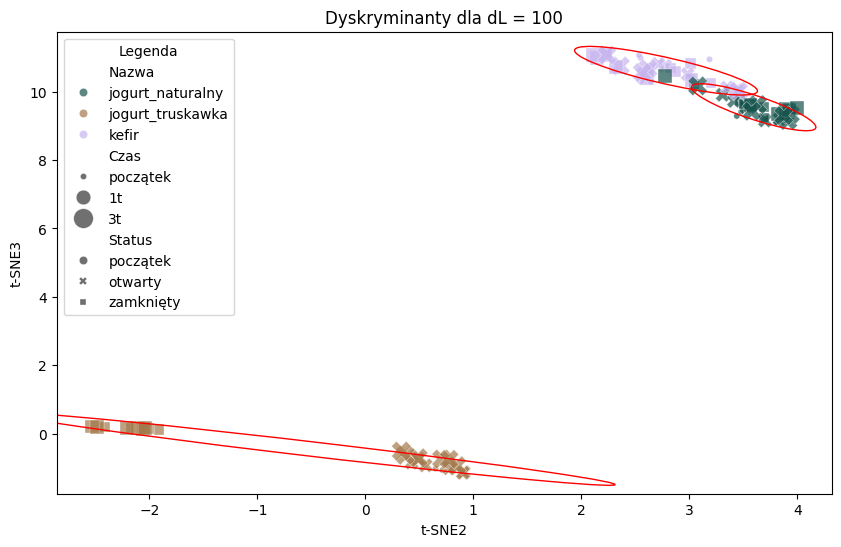

In [51]:
# Tworzenie modelu t-SNE
tsne_df, tsne = create_model(model_name=TSNE,
                           data=X,
                           labels=labels,
                           columns=['t-SNE1', 't-SNE2', 't-SNE3'],
                           n_components=3)

# Rysowanie wykresów dla UMAP
draw(model_df=tsne_df, discriminant_cols=['t-SNE2', 't-SNE3'], use_hull=False, use_confidence_ellipse=True, n_std=2.0)

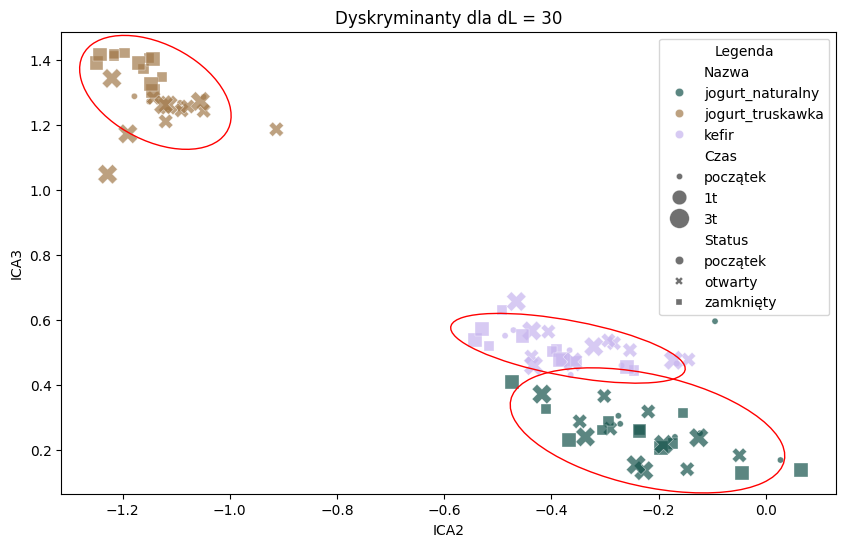

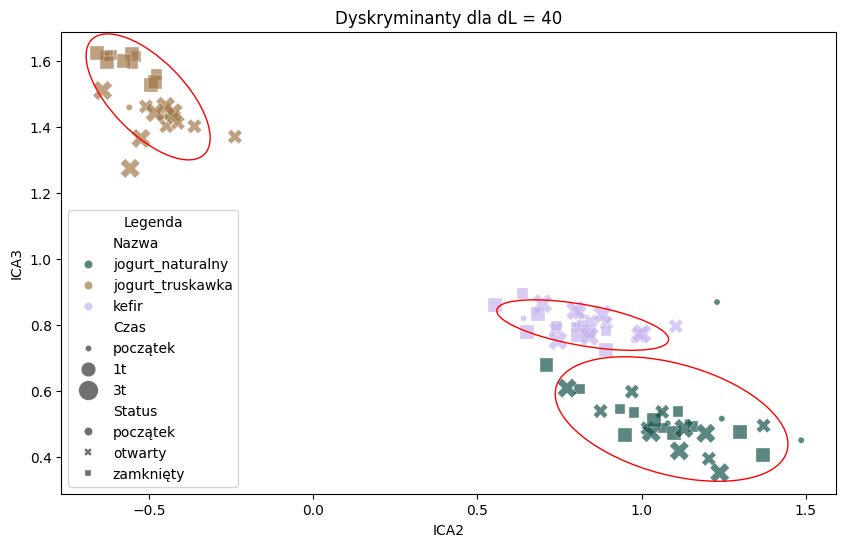

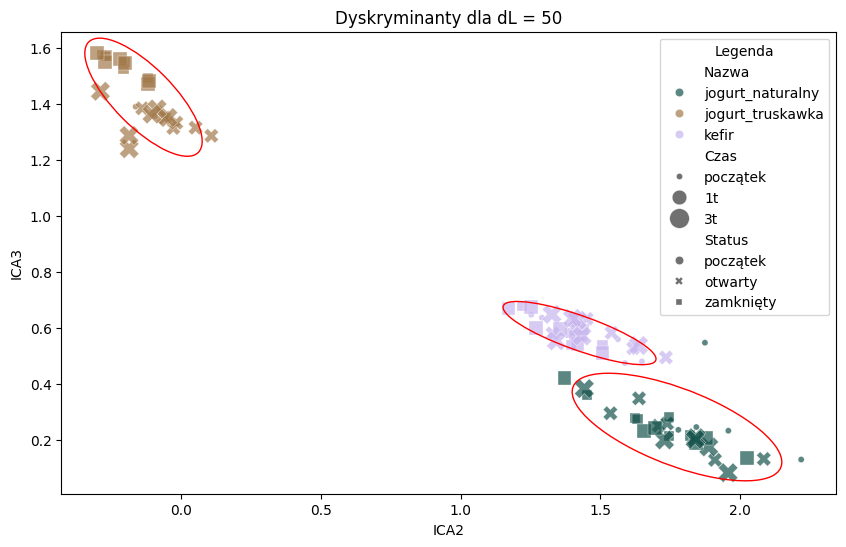

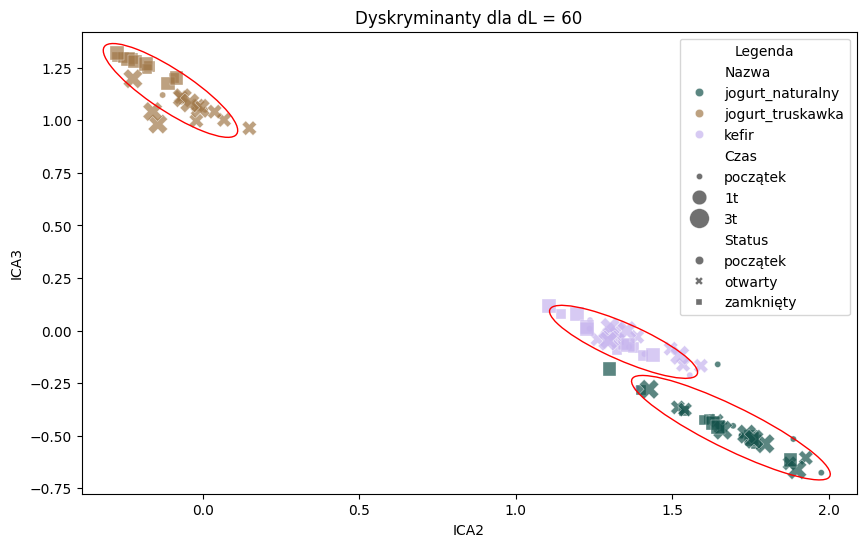

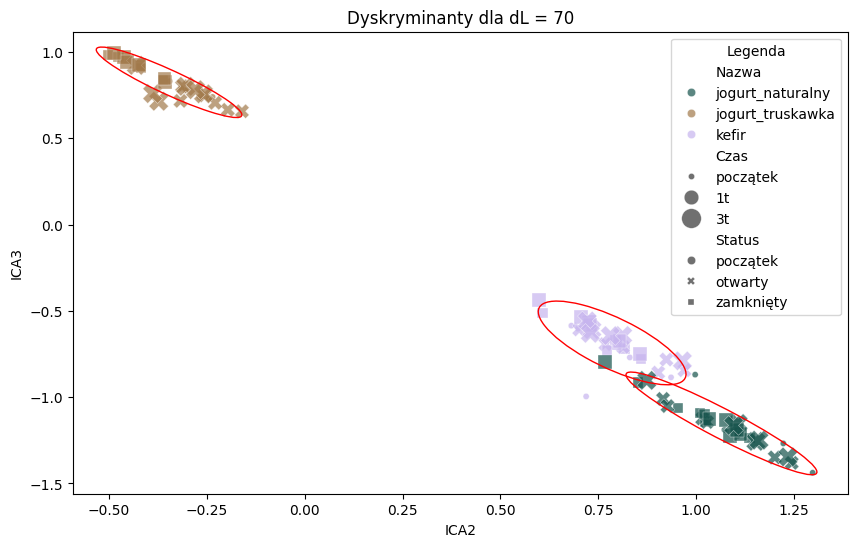

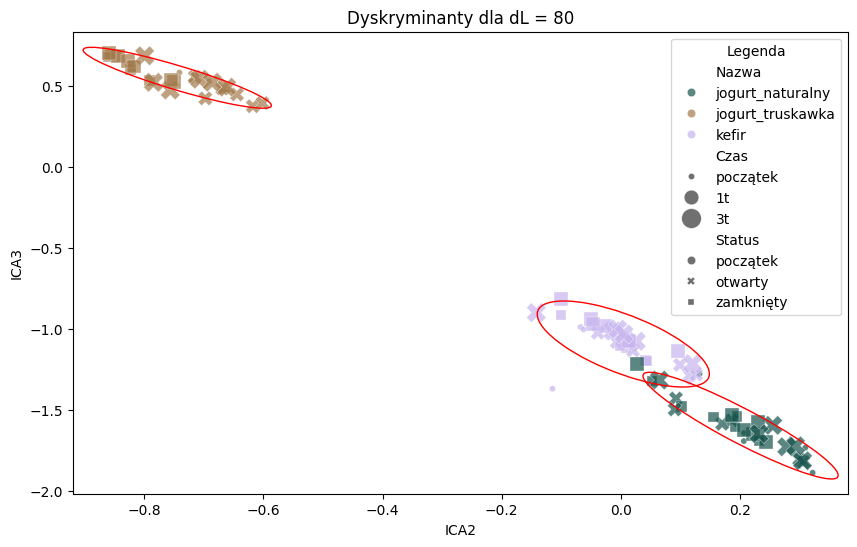

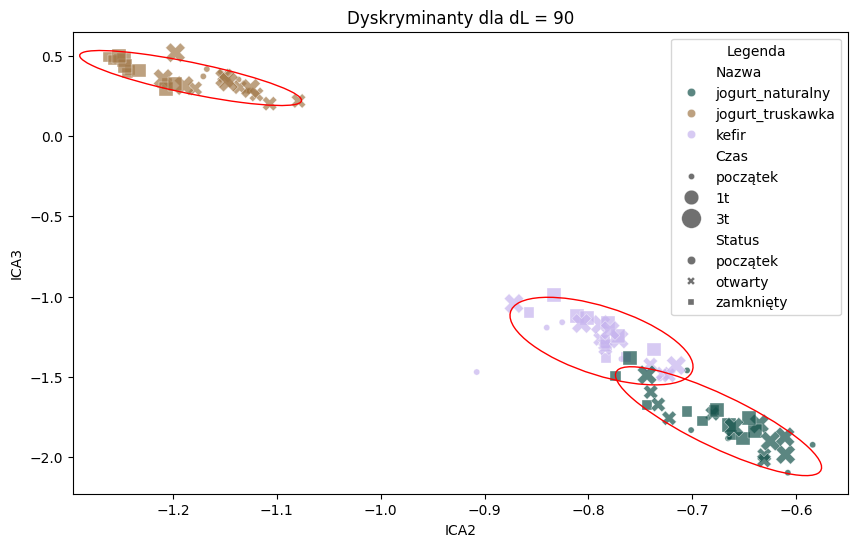

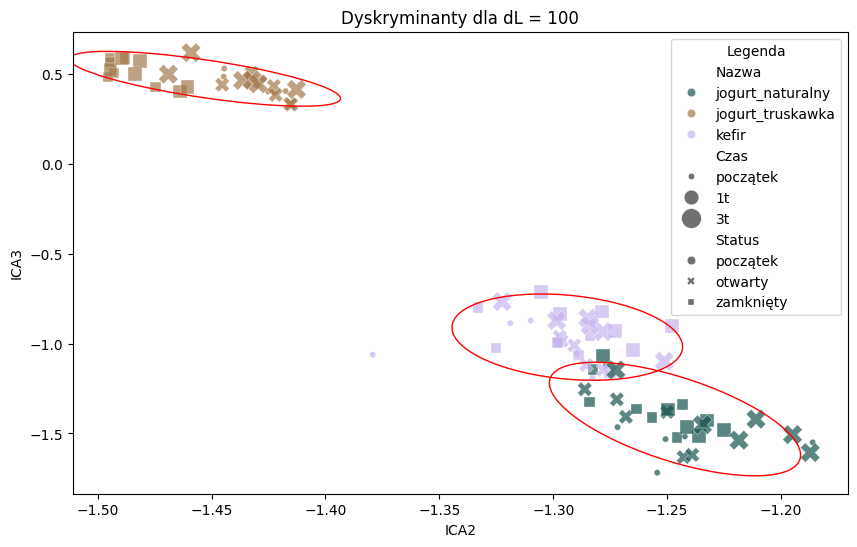

In [48]:
# Tworzenie modelu ICA
ica_df, ica = create_model(model_name=FastICA,
                           data=X,
                           labels=labels,
                           columns=['ICA1', 'ICA2', 'ICA3'],
                           n_components=3)

# Rysowanie wykresów dla ICA
draw(model_df=ica_df, discriminant_cols=['ICA2', 'ICA3'], use_hull=False, use_confidence_ellipse=True, n_std=2.0)

In [14]:
"""
# Rysowanie dendogramu dla PCA
draw_dendrogram_by_dl(data=pca_df, 
                      x_cols=['PC1', 'PC2'], 
                      group_column='dL', 
                      label_column='Nazwa')
"""

"\n# Rysowanie dendogramu dla PCA\ndraw_dendrogram_by_dl(data=pca_df, \n                      x_cols=['PC1', 'PC2'], \n                      group_column='dL', \n                      label_column='Nazwa')\n"

Metody redukcji wymiarowości oraz klasyfikacji

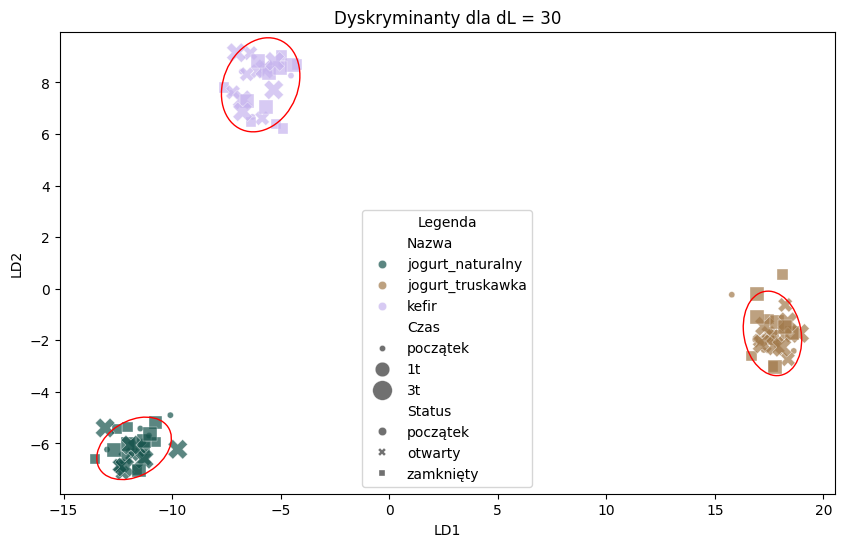

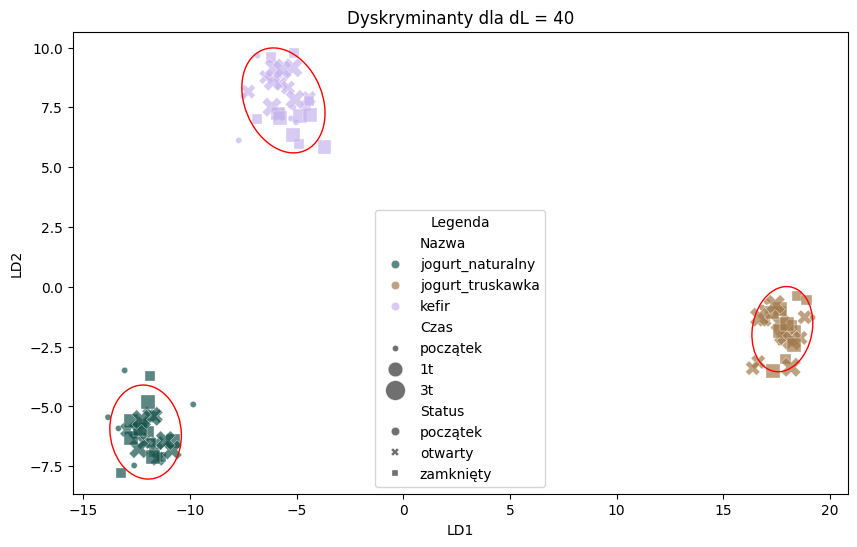

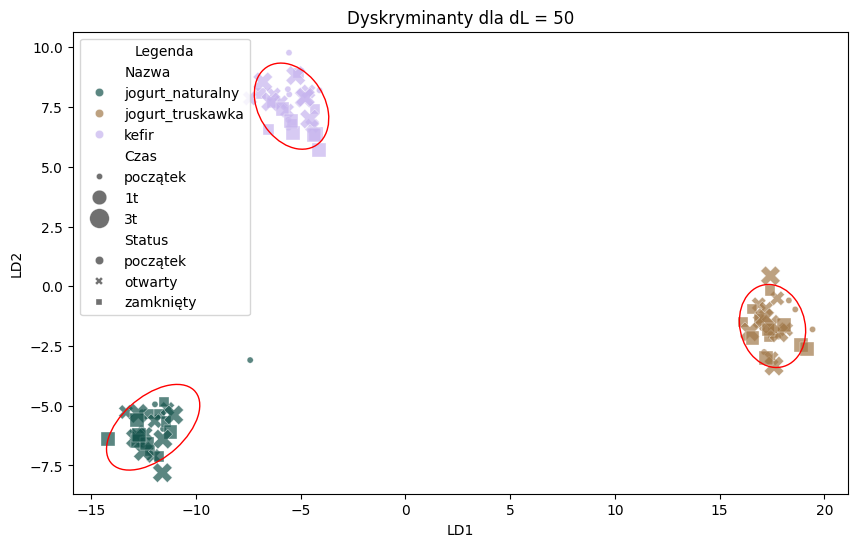

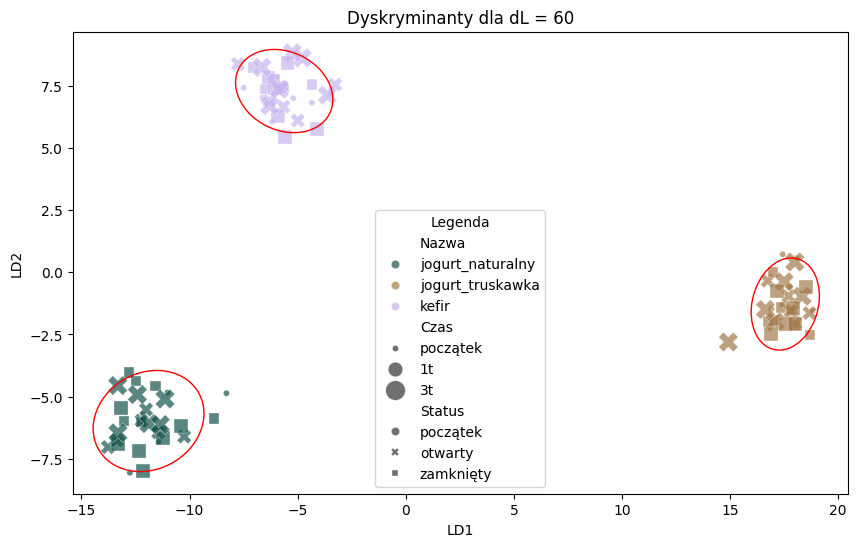

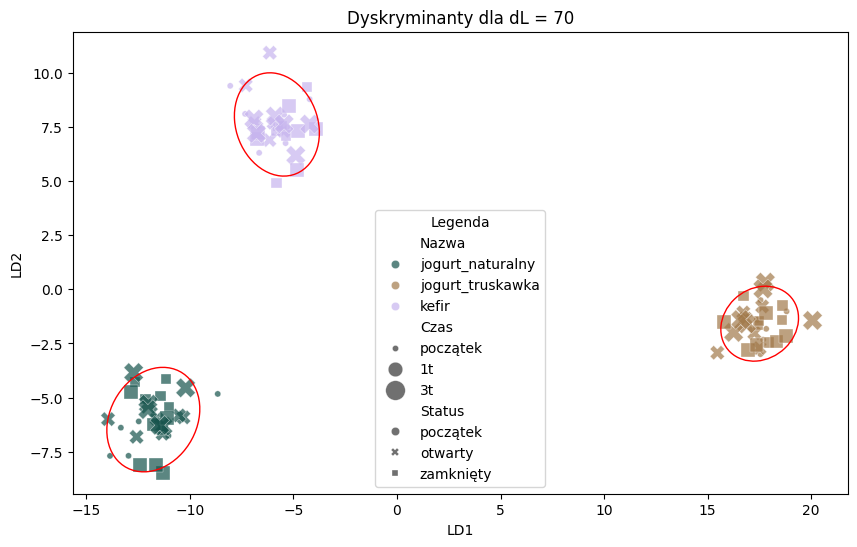

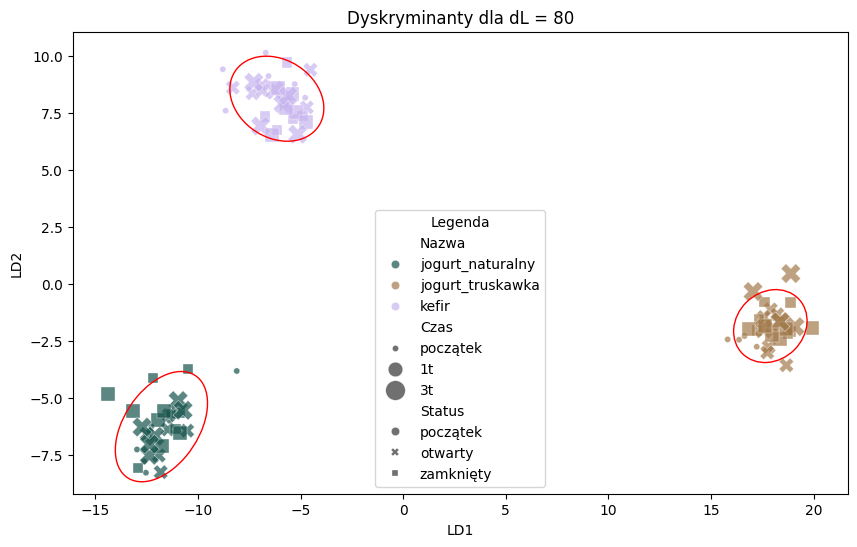

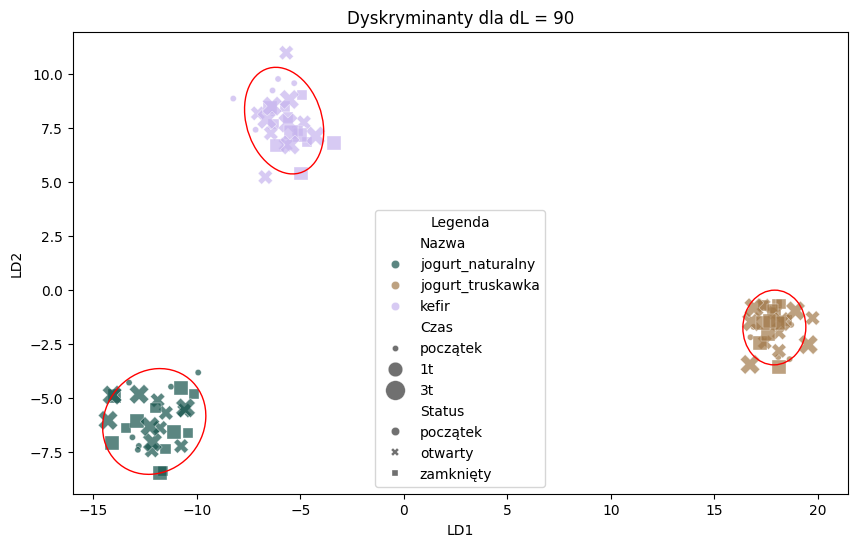

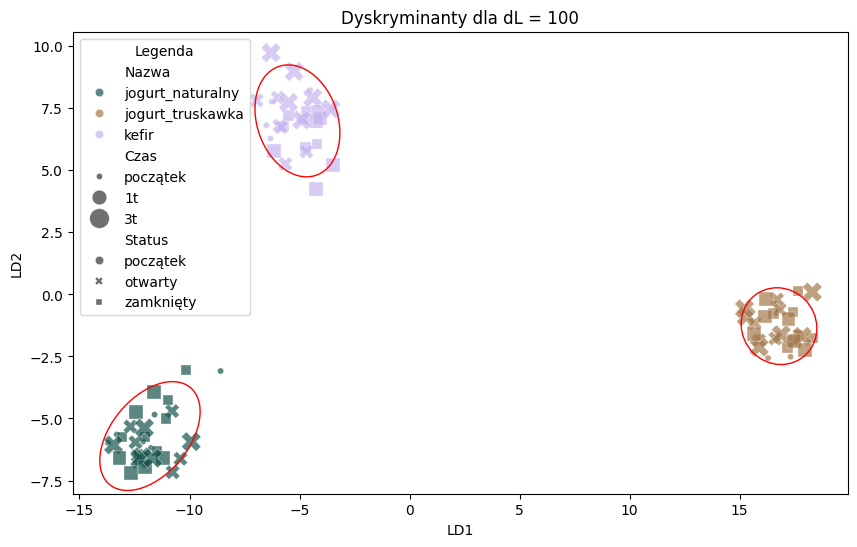

In [15]:
# Tworzenie zbioru target values Nazwa/Czas/Status
y = data['Nazwa']

# Tworzenie modelu LDA
lda_df, lda = create_model(model_name=LDA,
                           data=X,
                           labels=labels,
                           columns=['LD1', 'LD2'],
                           n_components=2,
                           y=y)

# Rysowanie wykresów dla LDA
draw(model_df=lda_df, discriminant_cols=['LD1', 'LD2'], use_hull=False, use_confidence_ellipse=True, n_std=2.0)

Techniki klasyfikacji nadzorowanej

In [16]:
# Liczba iteracji
n_iterations = 10

# Tworzenie zbioru target values
target_values = data['Nazwa']


In [17]:
# kNN

# Lista do przechowywania dokładności, precyzji, czułości i f1-score dla każdej iteracji
accuracy_scores = list()
precision_scores = list()
recall_scores = list()
f1_scores = list()

# Lista do przechowywania macierzy konfuzji dla każdej iteracji
confusion_matrices = []

# Pętla powtarzająca proces tworzenia i ewaluacji modelu
for i in range(n_iterations):
    # Podział danych
    X_train, X_test, y_train, y_test = split_data_randomly(data=data, 
                                                           y=target_values,
                                                           n_train=4)
    
    # Skalowanie danych
    X_train_scaled, X_test_scaled = scale_data(X_train=X_train, X_test=X_test)
    
    # Tworzenie, trenowanie modelu i przewidywanie
    y_pred = create_supervised_model(model_name=KNeighborsClassifier, 
                                     X_train=X_train_scaled,
                                     y_train=y_train,
                                     X_test=X_test_scaled,
                                     n_neighbors=5)
    
    # Obliczanie dokładności
    accuracy_scores = calc_metric(metric_name=accuracy_score, 
                                  list=accuracy_scores, 
                                  y_test=y_test,
                                  y_pred=y_pred)

    # Obliczanie precyzji
    precision_scores = calc_metric(metric_name=precision_score, 
                                   list=precision_scores, 
                                   y_test=y_test,
                                   y_pred=y_pred,
                                   average='micro')
    
    # Obliczanie czułości
    recall_scores = calc_metric(metric_name=recall_score, 
                                list=recall_scores, 
                                y_test=y_test,
                                y_pred=y_pred,
                                average='micro')
    
    # Obliczanie f1-score
    f1_scores = calc_metric(metric_name=f1_score, 
                            list=f1_scores, 
                            y_test=y_test,
                            y_pred=y_pred,
                            average='micro')
    
    # Obliczanie macierzy konfuzji
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)


# Obliczanie średniej dokładności
print_mean_calc_metric(metric_name=accuracy_score,
                       list=accuracy_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej precyzji
print_mean_calc_metric(metric_name=precision_score,
                       list=precision_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej czułości
print_mean_calc_metric(metric_name=recall_score,
                       list=recall_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej f1-score
print_mean_calc_metric(metric_name=f1_score,
                       list=f1_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej macierzy konfuzji
print_mean_confusion_matrix(list_of_cm=confusion_matrices,
                            n_iterations=n_iterations)




Average accuracy_score after 10 iterations: 0.98

Average precision_score after 10 iterations: 0.98

Average recall_score after 10 iterations: 0.98

Average f1_score after 10 iterations: 0.98

Average confusion matrix after 10 iterations:
[[77.2  0.   2.8]
 [ 0.  80.   0. ]
 [ 1.   0.  79. ]]


In [18]:
# Random Forest

# Lista do przechowywania dokładności, precyzji, czułości i f1-score dla każdej iteracji
accuracy_scores = list()
precision_scores = list()
recall_scores = list()
f1_scores = list()

# Lista do przechowywania macierzy konfuzji dla każdej iteracji
confusion_matrices = []

# Pętla powtarzająca proces tworzenia i ewaluacji modelu
for i in range(n_iterations):
    # Podział danych
    X_train, X_test, y_train, y_test = split_data_randomly(data=data, 
                                                           y=target_values,
                                                           n_train=4)
    
    # Skalowanie danych
    X_train_scaled, X_test_scaled = scale_data(X_train=X_train, X_test=X_test)
    
    # Tworzenie, trenowanie modelu i przewidywanie
    y_pred = create_supervised_model(model_name=RandomForestClassifier, 
                                     X_train=X_train_scaled,
                                     y_train=y_train,
                                     X_test=X_test_scaled,
                                     n_estimators=100)
    
    # Obliczanie dokładności
    accuracy_scores = calc_metric(metric_name=accuracy_score, 
                                  list=accuracy_scores, 
                                  y_test=y_test,
                                  y_pred=y_pred)

    # Obliczanie precyzji
    precision_scores = calc_metric(metric_name=precision_score, 
                                   list=precision_scores, 
                                   y_test=y_test,
                                   y_pred=y_pred,
                                   average='micro')
    
    # Obliczanie czułości
    recall_scores = calc_metric(metric_name=recall_score, 
                                list=recall_scores, 
                                y_test=y_test,
                                y_pred=y_pred,
                                average='micro')
    
    # Obliczanie f1-score
    f1_scores = calc_metric(metric_name=f1_score, 
                            list=f1_scores, 
                            y_test=y_test,
                            y_pred=y_pred,
                            average='micro')

    # Obliczanie macierzy konfuzji
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Obliczanie średniej dokładności
print_mean_calc_metric(metric_name=accuracy_score,
                       list=accuracy_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej precyzji
print_mean_calc_metric(metric_name=precision_score,
                       list=precision_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej czułości
print_mean_calc_metric(metric_name=recall_score,
                       list=recall_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej f1-score
print_mean_calc_metric(metric_name=f1_score,
                       list=f1_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej macierzy konfuzji
print_mean_confusion_matrix(list_of_cm=confusion_matrices,
                            n_iterations=n_iterations)



Average accuracy_score after 10 iterations: 0.97

Average precision_score after 10 iterations: 0.97

Average recall_score after 10 iterations: 0.97

Average f1_score after 10 iterations: 0.97

Average confusion matrix after 10 iterations:
[[74.9  0.   5.1]
 [ 0.1 79.9  0. ]
 [ 1.9  0.  78.1]]


In [19]:
# SVM

# Lista do przechowywania dokładności, precyzji, czułości i f1-score dla każdej iteracji
accuracy_scores = list()
precision_scores = list()
recall_scores = list()
f1_scores = list()

# Lista do przechowywania macierzy konfuzji dla każdej iteracji
confusion_matrices = []

# Pętla powtarzająca proces tworzenia i ewaluacji modelu
for i in range(n_iterations):
    # Podział danych
    X_train, X_test, y_train, y_test = split_data_randomly(data=data,
                                                           y=target_values,
                                                           n_train=4)
    
    # Skalowanie danych
    X_train_scaled, X_test_scaled = scale_data(X_train=X_train, X_test=X_test)
    
    # Tworzenie, trenowanie modelu i przewidywanie
    y_pred = create_supervised_model(model_name=SVC, 
                                     X_train=X_train_scaled,
                                     y_train=y_train,
                                     X_test=X_test_scaled,
                                     kernel='linear')
    
    # Obliczanie dokładności
    accuracy_scores = calc_metric(metric_name=accuracy_score, 
                                  list=accuracy_scores, 
                                  y_test=y_test,
                                  y_pred=y_pred)

    # Obliczanie precyzji
    precision_scores = calc_metric(metric_name=precision_score, 
                                   list=precision_scores, 
                                   y_test=y_test,
                                   y_pred=y_pred,
                                   average='micro')
    
    # Obliczanie czułości
    recall_scores = calc_metric(metric_name=recall_score, 
                                list=recall_scores, 
                                y_test=y_test,
                                y_pred=y_pred,
                                average='micro')
    
    # Obliczanie f1-score
    f1_scores = calc_metric(metric_name=f1_score, 
                            list=f1_scores, 
                            y_test=y_test,
                            y_pred=y_pred,
                            average='micro')
    
    # Obliczanie macierzy konfuzji
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)


# Obliczanie średniej dokładności
print_mean_calc_metric(metric_name=accuracy_score,
                       list=accuracy_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej precyzji
print_mean_calc_metric(metric_name=precision_score,
                       list=precision_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej czułości
print_mean_calc_metric(metric_name=recall_score,
                       list=recall_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej f1-score
print_mean_calc_metric(metric_name=f1_score,
                       list=f1_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej macierzy konfuzji
print_mean_confusion_matrix(list_of_cm=confusion_matrices,
                            n_iterations=n_iterations)




Average accuracy_score after 10 iterations: 0.99

Average precision_score after 10 iterations: 0.99

Average recall_score after 10 iterations: 0.99

Average f1_score after 10 iterations: 0.99

Average confusion matrix after 10 iterations:
[[77.   0.   3. ]
 [ 0.  80.   0. ]
 [ 0.2  0.  79.8]]


In [20]:
# Naive Bayes

# Lista do przechowywania dokładności, precyzji, czułości i f1-score dla każdej iteracji
accuracy_scores = list()
precision_scores = list()
recall_scores = list()
f1_scores = list()

# Lista do przechowywania macierzy konfuzji dla każdej iteracji
confusion_matrices = []

# Pętla powtarzająca proces tworzenia i ewaluacji modelu
for i in range(n_iterations):
    # Podział danych
    X_train, X_test, y_train, y_test = split_data_randomly(data=data,
                                                           y=target_values,
                                                           n_train=4)
    
    # Skalowanie danych
    X_train_scaled, X_test_scaled = scale_data(X_train=X_train, X_test=X_test)
    
    # Tworzenie, trenowanie modelu i przewidywanie
    y_pred = create_supervised_model(model_name=GaussianNB, 
                                     X_train=X_train_scaled,
                                     y_train=y_train,
                                     X_test=X_test_scaled)
    
    # Obliczanie dokładności
    accuracy_scores = calc_metric(metric_name=accuracy_score, 
                                  list=accuracy_scores, 
                                  y_test=y_test,
                                  y_pred=y_pred)

    # Obliczanie precyzji
    precision_scores = calc_metric(metric_name=precision_score, 
                                   list=precision_scores, 
                                   y_test=y_test,
                                   y_pred=y_pred,
                                   average='micro')
    
    # Obliczanie czułości
    recall_scores = calc_metric(metric_name=recall_score, 
                                list=recall_scores, 
                                y_test=y_test,
                                y_pred=y_pred,
                                average='micro')
    
    # Obliczanie f1-score
    f1_scores = calc_metric(metric_name=f1_score, 
                            list=f1_scores, 
                            y_test=y_test,
                            y_pred=y_pred,
                            average='micro')
    
    # Obliczanie macierzy konfuzji
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)


# Obliczanie średniej dokładności
print_mean_calc_metric(metric_name=accuracy_score,
                       list=accuracy_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej precyzji
print_mean_calc_metric(metric_name=precision_score,
                       list=precision_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej czułości
print_mean_calc_metric(metric_name=recall_score,
                       list=recall_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej f1-score
print_mean_calc_metric(metric_name=f1_score,
                       list=f1_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej macierzy konfuzji
print_mean_confusion_matrix(list_of_cm=confusion_matrices,
                            n_iterations=n_iterations)




Average accuracy_score after 10 iterations: 0.75

Average precision_score after 10 iterations: 0.75

Average recall_score after 10 iterations: 0.75

Average f1_score after 10 iterations: 0.75

Average confusion matrix after 10 iterations:
[[51.2  0.  28.8]
 [ 6.3 72.7  1. ]
 [20.   3.5 56.5]]


In [21]:
# Regresja logistyczna

# Lista do przechowywania dokładności, precyzji, czułości i f1-score dla każdej iteracji
accuracy_scores = list()
precision_scores = list()
recall_scores = list()
f1_scores = list()

# Lista do przechowywania macierzy konfuzji dla każdej iteracji
confusion_matrices = []

# Pętla powtarzająca proces tworzenia i ewaluacji modelu
for i in range(n_iterations):
    # Podział danych
    X_train, X_test, y_train, y_test = split_data_randomly(data=data,
                                                           y=target_values,
                                                           n_train=4)
    
    # Skalowanie danych
    X_train_scaled, X_test_scaled = scale_data(X_train=X_train, X_test=X_test)
    
    # Tworzenie, trenowanie modelu i przewidywanie
    y_pred = create_supervised_model(model_name=LogisticRegression, 
                                     X_train=X_train_scaled,
                                     y_train=y_train,
                                     X_test=X_test_scaled,
                                     max_iter=1000)
    
    # Obliczanie dokładności
    accuracy_scores = calc_metric(metric_name=accuracy_score, 
                                  list=accuracy_scores, 
                                  y_test=y_test,
                                  y_pred=y_pred)

    # Obliczanie precyzji
    precision_scores = calc_metric(metric_name=precision_score, 
                                   list=precision_scores, 
                                   y_test=y_test,
                                   y_pred=y_pred,
                                   average='micro')
    
    # Obliczanie czułości
    recall_scores = calc_metric(metric_name=recall_score, 
                                list=recall_scores, 
                                y_test=y_test,
                                y_pred=y_pred,
                                average='micro')
    
    # Obliczanie f1-score
    f1_scores = calc_metric(metric_name=f1_score, 
                            list=f1_scores, 
                            y_test=y_test,
                            y_pred=y_pred,
                            average='micro')
    
    # Obliczanie macierzy konfuzji
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)


# Obliczanie średniej dokładności
print_mean_calc_metric(metric_name=accuracy_score,
                       list=accuracy_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej precyzji
print_mean_calc_metric(metric_name=precision_score,
                       list=precision_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej czułości
print_mean_calc_metric(metric_name=recall_score,
                       list=recall_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej f1-score
print_mean_calc_metric(metric_name=f1_score,
                       list=f1_scores,
                       n_iterations=n_iterations)

# Obliczanie średniej macierzy konfuzji
print_mean_confusion_matrix(list_of_cm=confusion_matrices,
                            n_iterations=n_iterations)



Average accuracy_score after 10 iterations: 0.99

Average precision_score after 10 iterations: 0.99

Average recall_score after 10 iterations: 0.99

Average f1_score after 10 iterations: 0.99

Average confusion matrix after 10 iterations:
[[76.8  0.   3.2]
 [ 0.  80.   0. ]
 [ 0.3  0.  79.7]]


In [22]:
y_test.value_counts()

Nazwa
jogurt_naturalny    80
jogurt_truskawka    80
kefir               80
Name: count, dtype: int64

In [23]:
xpp = pd.Series(y_pred)
xpp.value_counts()

kefir               87
jogurt_truskawka    80
jogurt_naturalny    73
Name: count, dtype: int64